# Postmodeling 


This notebook demonstrates how we can use the postmodeling module of triage to dive deeper into the models we have trained. Typically, we do this anaylsis after we do Audition to narrow down the model groups we are interested in. Here, we take three models trained to predict the likelihood of experiencing a near-term (6 months) severe behavioral health episode for people who have interacted with county services to demonstrate how this module can be used. 

In the rest of this notebook we'll use the following models: 

|Model group id| Model type|
|:----------|:-----------------|
|16|RandomForestClassifier|
|125|DecisionTreeClassifier|
|117|Baseline|


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import yaml

from triage.component.postmodeling.base import MultiModelAnalyzer, SingleModelAnalyzer
from triage.component.postmodeling.crosstabs import run_crosstabs_from_matrix
from triage.component.postmodeling.add_predictions import add_predictions
from triage.util.db import create_engine
from sqlalchemy.engine.url import URL

In [ ]:
with open("database.yaml", "r") as f:
    db_conf = yaml.safe_load(f)

db_url = URL(
            'postgres',
            host=db_conf['host'],
            username=db_conf['user'],
            database=db_conf['db'],
            password=db_conf['pass'],
            port=db_conf['port'],
        )

db_engine = create_engine(db_url)

In [4]:
db_engine = create_engine(db_url)

## Parameters

In [5]:
model_grp_rf = 16
model_grp_dt = 125
model_grp_baseline = 117
experiment_hash = 'f2614123549000597dbda80cb6e629b4'
model_id_rf = 1359
model_id_dt = 1214
model_id_baseline = 1210

## Postmodeling analysis on a Model

This analysis allows you to get some important characteristics specific to a single `model_id`. 

In [6]:
sma = SingleModelAnalyzer(model_id_rf, db_engine)

### 1. Score distribution

#### Without label

<Figure size 432x288 with 0 Axes>

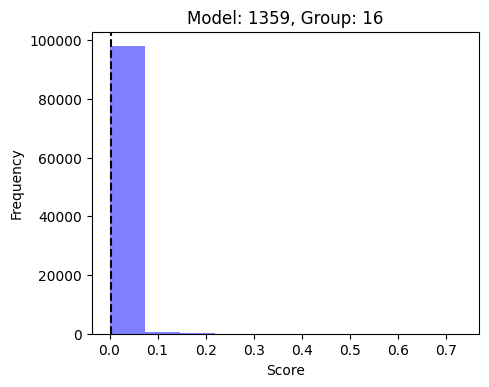

In [7]:
plt.clf()

fig, axes = plt.subplots(1, 1, figsize=(5, 4), sharey=True, sharex=True, dpi=100)
sma.plot_score_distribution(axes)

plt.show()

#### With label

<Figure size 432x288 with 0 Axes>

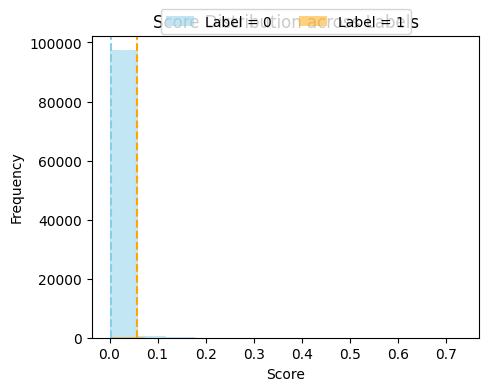

In [8]:
plt.clf()

fig, axes = plt.subplots(1, 1, figsize=(5, 4), sharey=True, sharex=True, dpi=100)
sma.plot_score_label_distribution(axes)

plt.show()

### 2. Get top k

In [9]:
sma.get_top_k(threshold_type='rank_abs_no_ties', threshold=100)

entity_id as_of_date    score  label_value  rank_abs_no_ties  \
0   100035417 2019-01-01  0.73274            1                 1   
1   100306650 2019-01-01  0.59728            1                 2   
2   100310618 2019-01-01  0.59093            0                 3   
3   100081853 2019-01-01  0.55056            1                 4   
4   100231805 2019-01-01  0.51517            0                 5   
..        ...        ...      ...          ...               ...   
95  100290095 2019-01-01  0.19706            0                96   
96  100000836 2019-01-01  0.19663            0                97   
97  100251437 2019-01-01  0.19576            0                98   
98  100332831 2019-01-01  0.19469            1                99   
99  100241145 2019-01-01  0.19469            0               100   

    rank_abs_with_ties  rank_pct_no_ties  rank_pct_with_ties  \
0                    1           0.00001             0.00003   
1                    2           0.00002             0.00005   
2                    3           0.00003             0.00008   
3                    4           0.00004             0.00011   
4                    5           0.00005             0.00013   
..                 ...               ...                 ...   
95                  96           0.00097             0.00256   
96                  97           0.00098             0.00259   
97                  98           0.00099             0.00261   
98                  99           0.00100             0.00264   
99                 100           0.00101             0.00267   

                         matrix_uuid  
0   1797ae01ada3a0b4a39d6d489ecf5fa1  
1   1797ae01ada3a0b4a39d6d489ecf5fa1  
2   1797ae01ada3a0b4a39d6d489ecf5fa1  
3   1797ae01ada3a0b4a39d6d489ecf5fa1  
4   1797ae01ada3a0b4a39d6d489ecf5fa1  
..                               ...  
95  1797ae01ada3a0b4a39d6d489ecf5fa1  
96  1797ae01ada3a0b4a39d6d489ecf5fa1  
97  1797ae01ada3a0b4a39d6d489ecf5fa1  
98  1797ae01ada3a0b4a39d6d489ecf5fa1  
99  1797ae01ada3a0b4a39d6d489ecf5fa1  

[100 rows x 9 columns]

### 3. Crosstabs

In [10]:
project_path = 's3://dsapp-health-migrated/dojo-mh/triage_output/'
thresholds = {'rank_abs_no_ties': 100} # top 100 abs 
#model_id = 1494

In [11]:
sma.crosstabs_pos_vs_neg(project_path, thresholds, replace=False)

2025-11-12 21:13:21 - WARNING Crosstabs aleady exist for model 1359 and matrix_uuid=1797ae01ada3a0b4a39d6d489ecf5fa1
2025-11-12 21:13:21 -    INFO Replace set to False. Not calculating crosstabs for model 1359 and matrix_uuid='1797ae01ada3a0b4a39d6d489ecf5fa1';


model_id                       matrix_uuid  \
0          1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
1          1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
2          1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
3          1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
4          1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
...         ...                               ...   
17482      1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
17483      1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
17484      1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
17485      1359  1797ae01ada3a0b4a39d6d489ecf5fa1   
17486      1359  1797ae01ada3a0b4a39d6d489ecf5fa1   

                                       feature  \
0        b_joco_event_entity_id_6month_dsl_imp   
1         b_diagnoses_entity_id_3month_dsl_min   
2         b_diagnoses_entity_id_3month_dsl_imp   
3           b_jail_entity_id_all_jail_days_sum   
4            b_all_event_entity_id_all_dsl_min   
...                                        ...   
17482            d_juv_entity_id_all_total_imp   
17483  d_nbh_diag_entity_id_6month_total_count   
17484    d_nbh_diag_entity_id_6month_total_imp   
17485     d_nbh_diag_entity_id_all_total_count   
17486       d_nbh_diag_entity_id_all_total_imp   

                               metric    threshold_type  threshold  \
0             mean_predicted_positive  rank_abs_no_ties        100   
1             mean_predicted_positive  rank_abs_no_ties        100   
2             mean_predicted_positive  rank_abs_no_ties        100   
3             mean_predicted_positive  rank_abs_no_ties        100   
4             mean_predicted_positive  rank_abs_no_ties        100   
...                               ...               ...        ...   
17482  support_pct_predicted_negative  rank_abs_no_ties        100   
17483  support_pct_predicted_negative  rank_abs_no_ties        100   
17484  support_pct_predicted_negative  rank_abs_no_ties        100   
17485  support_pct_predicted_negative  rank_abs_no_ties        100   
17486  support_pct_predicted_negative  rank_abs_no_ties        100   

               value  
0           0.000000  
1      320024.687500  
2           0.320000  
3          22.709999  
4           8.390000  
...              ...  
17482       0.999000  
17483       0.000000  
17484       1.000000  
17485       0.000000  
17486       1.000000  

[17487 rows x 7 columns]


> In case you don't have crosstabs analysis results saved, remove the flag `replace`, or set it to `True` like the following lines

In [12]:
#sma = SingleModelAnalyzer(1214, db_engine)

In [13]:
#sma.crosstabs_pos_vs_neg(project_path, thresholds)

### 4. Feature importance

In [14]:
# getting the actual numbers
sma.get_feature_importances()

feature  feature_importance  \
0      b_all_event_gaps_entity_id_all_days_btwn_max            0.009063   
1      b_all_event_gaps_entity_id_all_days_btwn_avg            0.009005   
2   b_all_event_gaps_entity_id_5years_days_btwn_max            0.008981   
3                       b_age_entity_id_all_age_avg            0.008966   
4   b_all_event_gaps_entity_id_5years_days_btwn_avg            0.008836   
5   b_all_event_gaps_entity_id_3years_days_btwn_max            0.008800   
6   b_all_event_gaps_entity_id_3years_days_btwn_avg            0.008533   
7    b_all_event_gaps_entity_id_1year_days_btwn_avg            0.008481   
8    b_all_event_gaps_entity_id_1year_days_btwn_max            0.008326   
9                 b_all_event_entity_id_all_dsl_min            0.008163   
10               b_joco_event_entity_id_all_dsl_min            0.008159   
11             b_joco_event_entity_id_1year_dsl_min            0.008002   
12  b_all_event_gaps_entity_id_6month_days_btwn_max            0.006815   
13  b_all_event_gaps_entity_id_6month_days_btwn_avg            0.006793   
14            b_all_event_entity_id_all_total_count            0.006179   
15           b_joco_event_entity_id_all_total_count            0.006082   
16            b_joco_event_entity_id_6month_dsl_min            0.006036   
17                  j_calls_entity_id_5year_dsl_min            0.005908   
18                    j_calls_entity_id_all_dsl_min            0.005904   
19  b_all_event_gaps_entity_id_3month_days_btwn_max            0.005715   

    rank_abs  
0          1  
1          2  
2          3  
3          4  
4          5  
5          6  
6          7  
7          8  
8          9  
9         10  
10        11  
11        12  
12        13  
13        14  
14        15  
15        16  
16        17  
17        18  
18        19  
19        20

<Figure size 432x288 with 0 Axes>

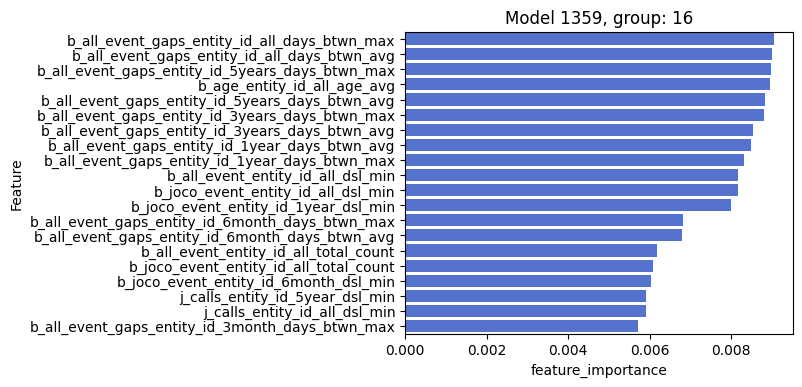

In [15]:
plt.clf()

fig, axes = plt.subplots(1, 1, figsize=(5, 4), sharey=True, sharex=True, dpi=100)
sma.plot_feature_importance(axes)

plt.show()

### 5. PR-k curve

<AxesSubplot:title={'center':'Model: 1359, Group: 16'}, xlabel='Population percentage (k %)', ylabel='Metric Value'>

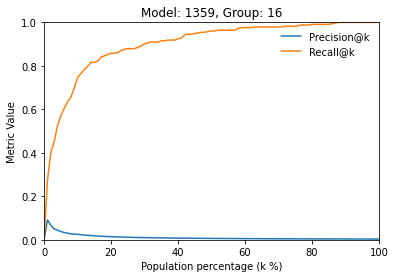

In [16]:
sma.plot_precision_recall_curve()

### 6. Bias and Fairness

<Figure size 432x288 with 0 Axes>

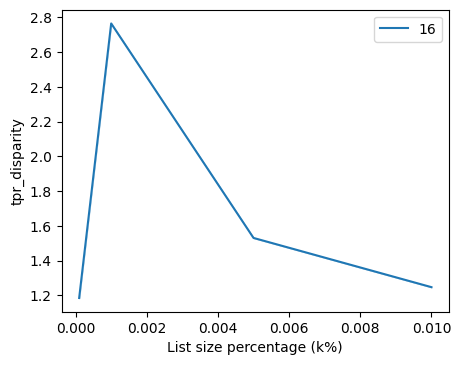

In [17]:
plt.clf()

fig, axes = plt.subplots(1, 1, figsize=(5, 4), sharey=True, sharex=True, dpi=100)
sma.plot_bias_threshold_curve(attribute_name='sex', attribute_value='FEMALE', bias_metric='tpr_disparity', ax=axes)

plt.show()

### 7. Error analysis


2025-11-12 21:13:24 -    INFO extracting predictions from model id: 1359
2025-11-12 21:13:24 -    INFO matrix uuid: 1797ae01ada3a0b4a39d6d489ecf5fa1
2025-11-12 21:13:24 -    INFO file in S3
2025-11-12 21:13:24 -    INFO Found credentials in shared credentials file: ~/.aws/credentials


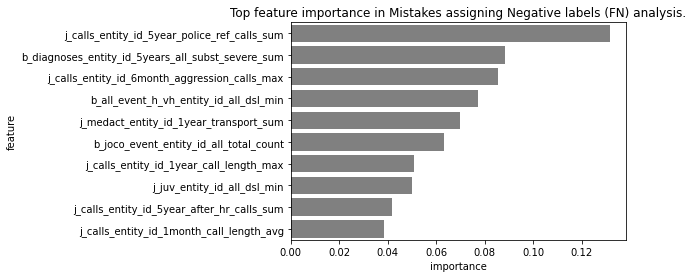

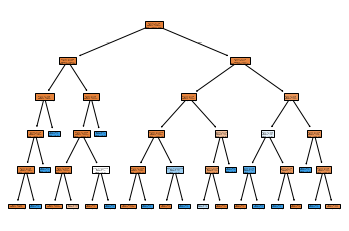

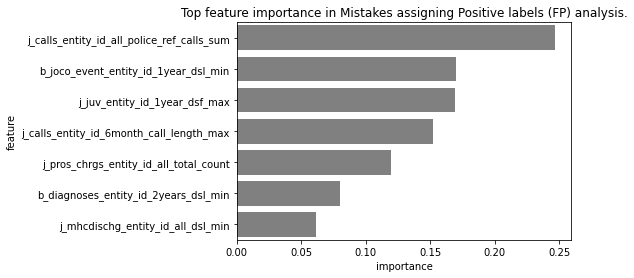

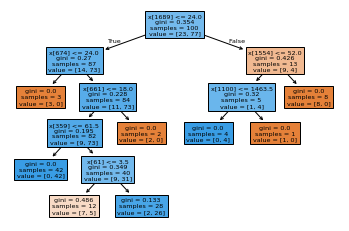

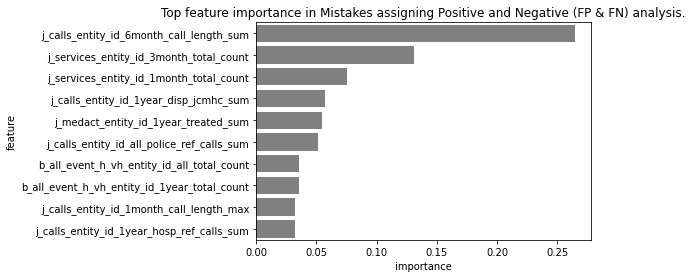

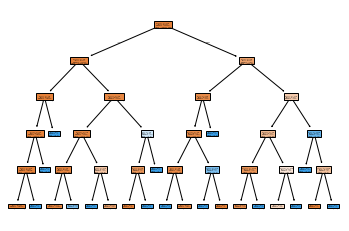

In [18]:
error_analysis = sma.error_analysis(project_path)

## Model Group Postmodeling analysis

Create a `MultiModelAnalyzer` with: 
- A list of model group ids you would like to compare
- A list of experiment hashes associated with the model group ids. Even if all model group ids has the same experiment hash (are part of the same experiment), you need send the experiment hash as a list
- The SQL engine

In [19]:
mma = MultiModelAnalyzer(db_engine, [model_grp_rf, model_grp_dt, model_grp_baseline], [experiment_hash])

### 1. Model group ids on the analysis

In [20]:
# ## add predictions 
# project_path =  's3://dsapp-health-migrated/dojo-mh/triage_output/'

# add_predictions(
#     db_engine=db_engine, # The database connection
#     model_groups=[model_grp_dt], # List of model groups  
#     project_path=project_path, # where the models and matrices are stored
#     rank_order='worst', # How to break ties
#     replace=False, # Whether to replace existing predictions
#     experiment_hashes=[experiment_hash]
# )



In [21]:
mma.display_model_groups()

{'model_group_id': 16, 'model_type': 'sklearn.ensemble.RandomForestClassifier', 'hyperparameters': {'max_depth': 150, 'max_features': 'sqrt', 'n_estimators': 5000, 'min_samples_split': 10}}
{'model_group_id': 117, 'model_type': 'triage.component.catwalk.baselines.rankers.BaselineRankMultiFeature', 'hyperparameters': {'rules': [{'feature': 'b_all_event_entity_id_all_dsl_min', 'low_value_high_score': True}]}}
{'model_group_id': 125, 'model_type': 'sklearn.tree.DecisionTreeClassifier', 'hyperparameters': {'max_depth': 3, 'min_samples_split': 30}}


model_group_id train_end_time  model_id  \
0               16     2017-07-01      1344   
1               16     2018-01-01      1349   
2               16     2018-07-01      1354   
3               16     2019-01-01      1359   
4               16     2019-07-01      1364   
5               16     2020-01-01      1369   
6               16     2020-07-01      1374   
7               16     2021-01-01      1379   
8               16     2021-07-01      1384   
9               16     2022-01-01      1389   
10              16     2022-07-01      1394   
11              16     2023-01-01      1399   
12              16     2023-07-01      1404   
13             125     2017-07-01      1175   
14             125     2018-01-01      1188   
15             125     2018-07-01      1201   
16             125     2019-01-01      1214   
17             125     2019-07-01      1227   
18             125     2020-01-01      1240   
19             125     2020-07-01      1253   
20             125     2021-01-01      1266   
21             125     2021-07-01      1279   
22             125     2022-01-01      1292   
23             125     2022-07-01      1305   
24             125     2023-01-01      1318   
25             125     2023-07-01      1331   
26             117     2017-07-01      1171   
27             117     2018-01-01      1184   
28             117     2018-07-01      1197   
29             117     2019-01-01      1210   
30             117     2019-07-01      1223   
31             117     2020-01-01      1236   
32             117     2020-07-01      1249   
33             117     2021-01-01      1262   
34             117     2021-07-01      1275   
35             117     2022-01-01      1288   
36             117     2022-07-01      1301   
37             117     2023-01-01      1314   
38             117     2023-07-01      1327   

                                           model_type  \
0             sklearn.ensemble.RandomForestClassifier   
1             sklearn.ensemble.RandomForestClassifier   
2             sklearn.ensemble.RandomForestClassifier   
3             sklearn.ensemble.RandomForestClassifier   
4             sklearn.ensemble.RandomForestClassifier   
5             sklearn.ensemble.RandomForestClassifier   
6             sklearn.ensemble.RandomForestClassifier   
7             sklearn.ensemble.RandomForestClassifier   
8             sklearn.ensemble.RandomForestClassifier   
9             sklearn.ensemble.RandomForestClassifier   
10            sklearn.ensemble.RandomForestClassifier   
11            sklearn.ensemble.RandomForestClassifier   
12            sklearn.ensemble.RandomForestClassifier   
13                sklearn.tree.DecisionTreeClassifier   
14                sklearn.tree.DecisionTreeClassifier   
15                sklearn.tree.DecisionTreeClassifier   
16                sklearn.tree.DecisionTreeClassifier   
17                sklearn.tree.DecisionTreeClassifier   
18                sklearn.tree.DecisionTreeClassifier   
19                sklearn.tree.DecisionTreeClassifier   
20                sklearn.tree.DecisionTreeClassifier   
21                sklearn.tree.DecisionTreeClassifier   
22                sklearn.tree.DecisionTreeClassifier   
23                sklearn.tree.DecisionTreeClassifier   
24                sklearn.tree.DecisionTreeClassifier   
25                sklearn.tree.DecisionTreeClassifier   
26  triage.component.catwalk.baselines.rankers.Bas...   
27  triage.component.catwalk.baselines.rankers.Bas...   
28  triage.component.catwalk.baselines.rankers.Bas...   
29  triage.component.catwalk.baselines.rankers.Bas...   
30  triage.component.catwalk.baselines.rankers.Bas...   
31  triage.component.catwalk.baselines.rankers.Bas...   
32  triage.component.catwalk.baselines.rankers.Bas...   
33  triage.component.catwalk.baselines.rankers.Bas...   
34  triage.component.catwalk.baselines.rankers.Bas...   
35  triage.component.catwalk.baselines.rankers.Bas...   
36  triage.com

### 2. Score distributions

#### Scores without label

2025-11-12 21:13:45 -    INFO (13, 3)


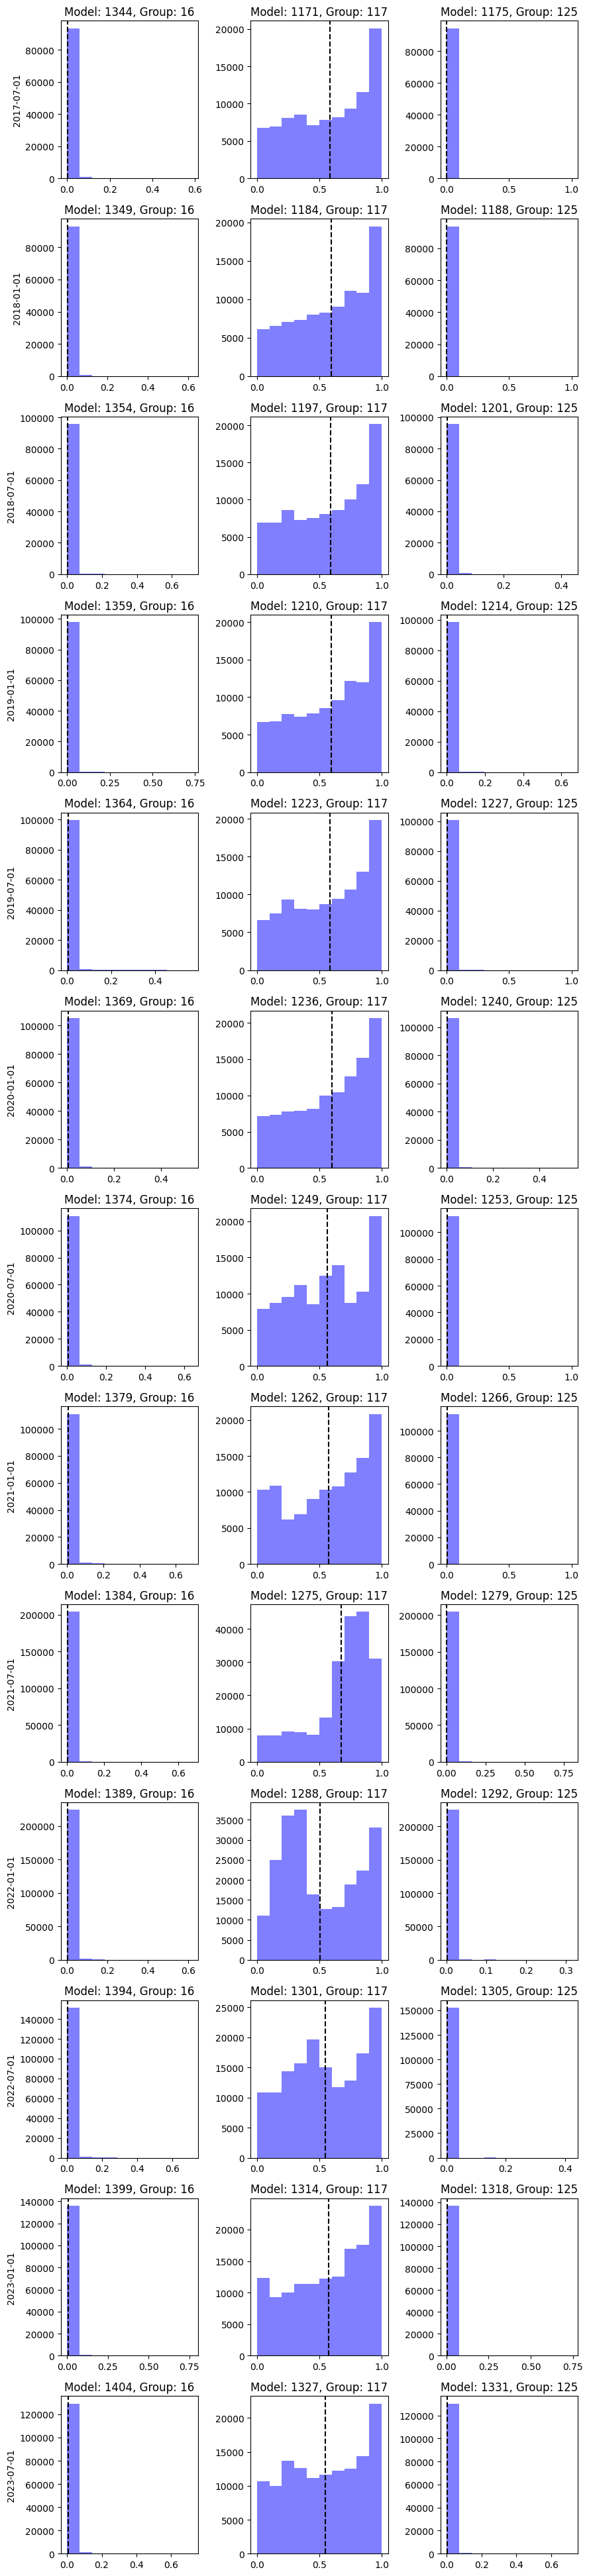

In [22]:
mma.plot_score_distributions()

#### Score distributions with label 

2025-11-12 21:14:29 -    INFO (13, 3)


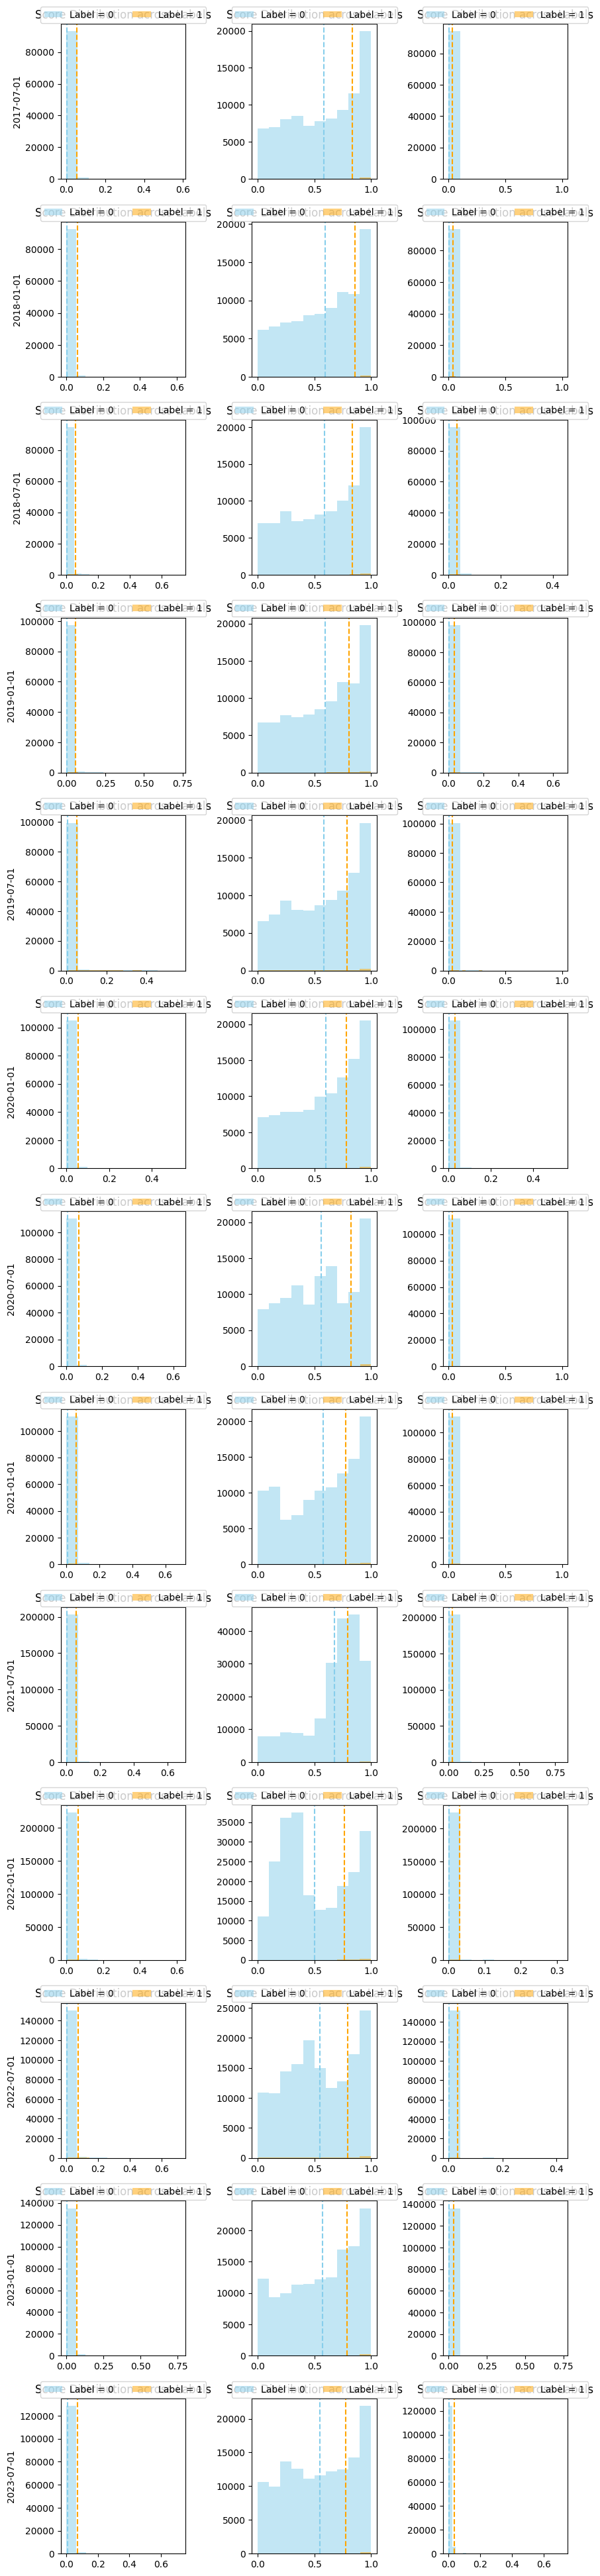

In [23]:
mma.plot_score_distributions(use_labels=True)

### 3. PR-k curves

2025-11-12 21:15:12 -    INFO (13, 3)


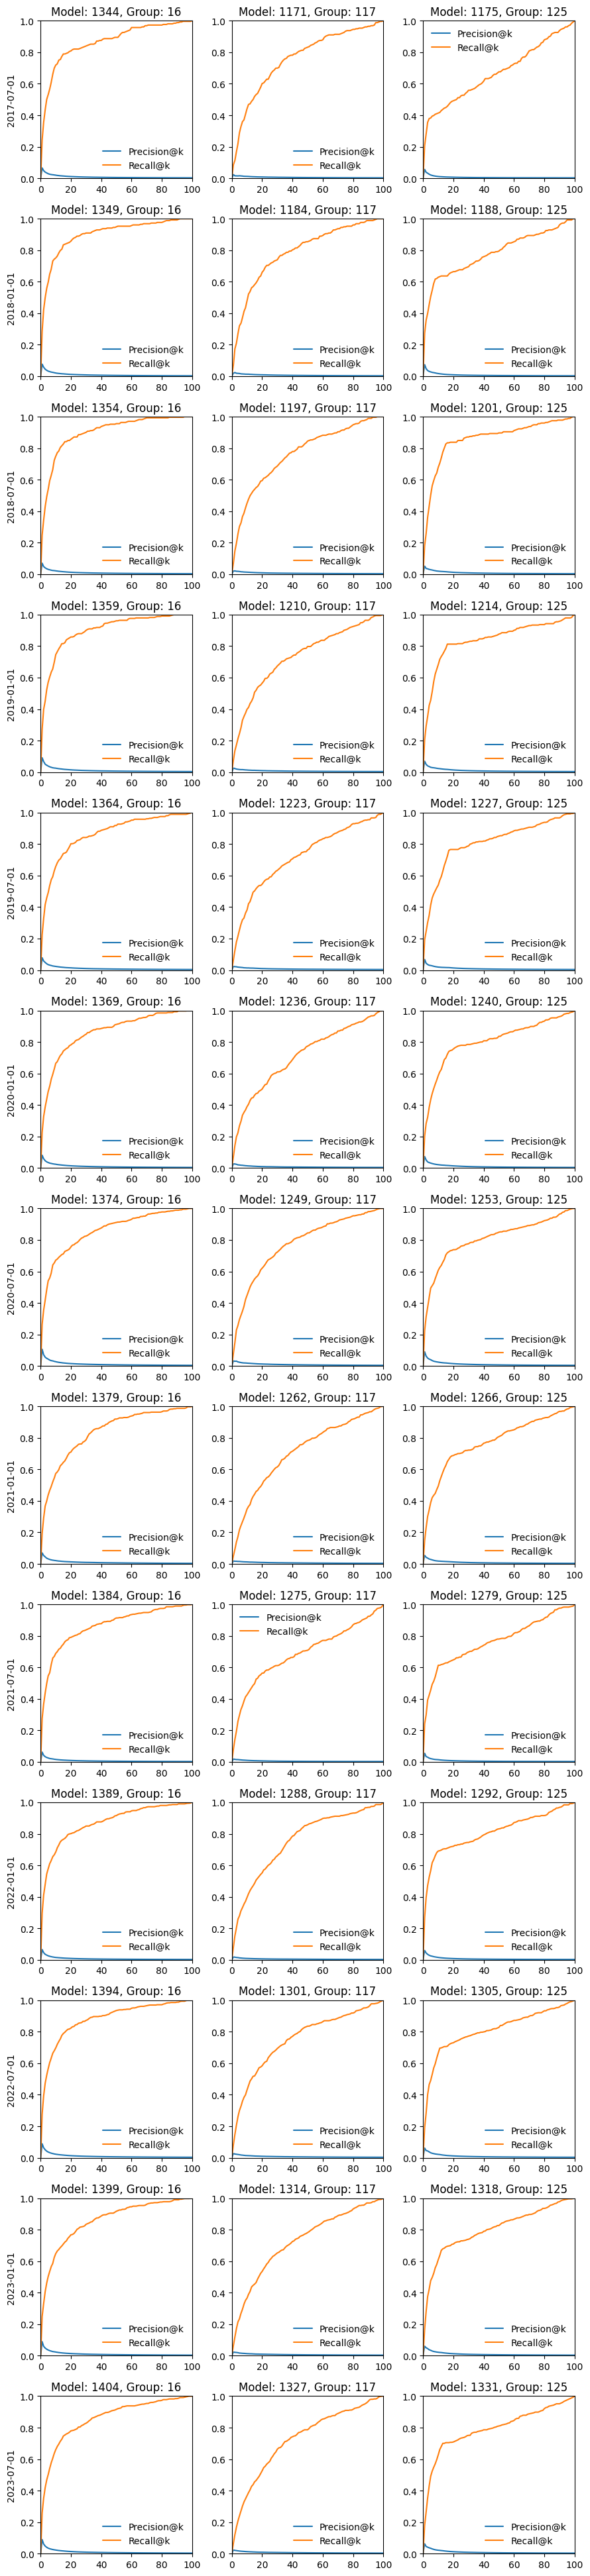

In [24]:
mma.plot_prk_curves()

### 4. Feature importances

2025-11-12 21:16:02 -    INFO (13, 3)


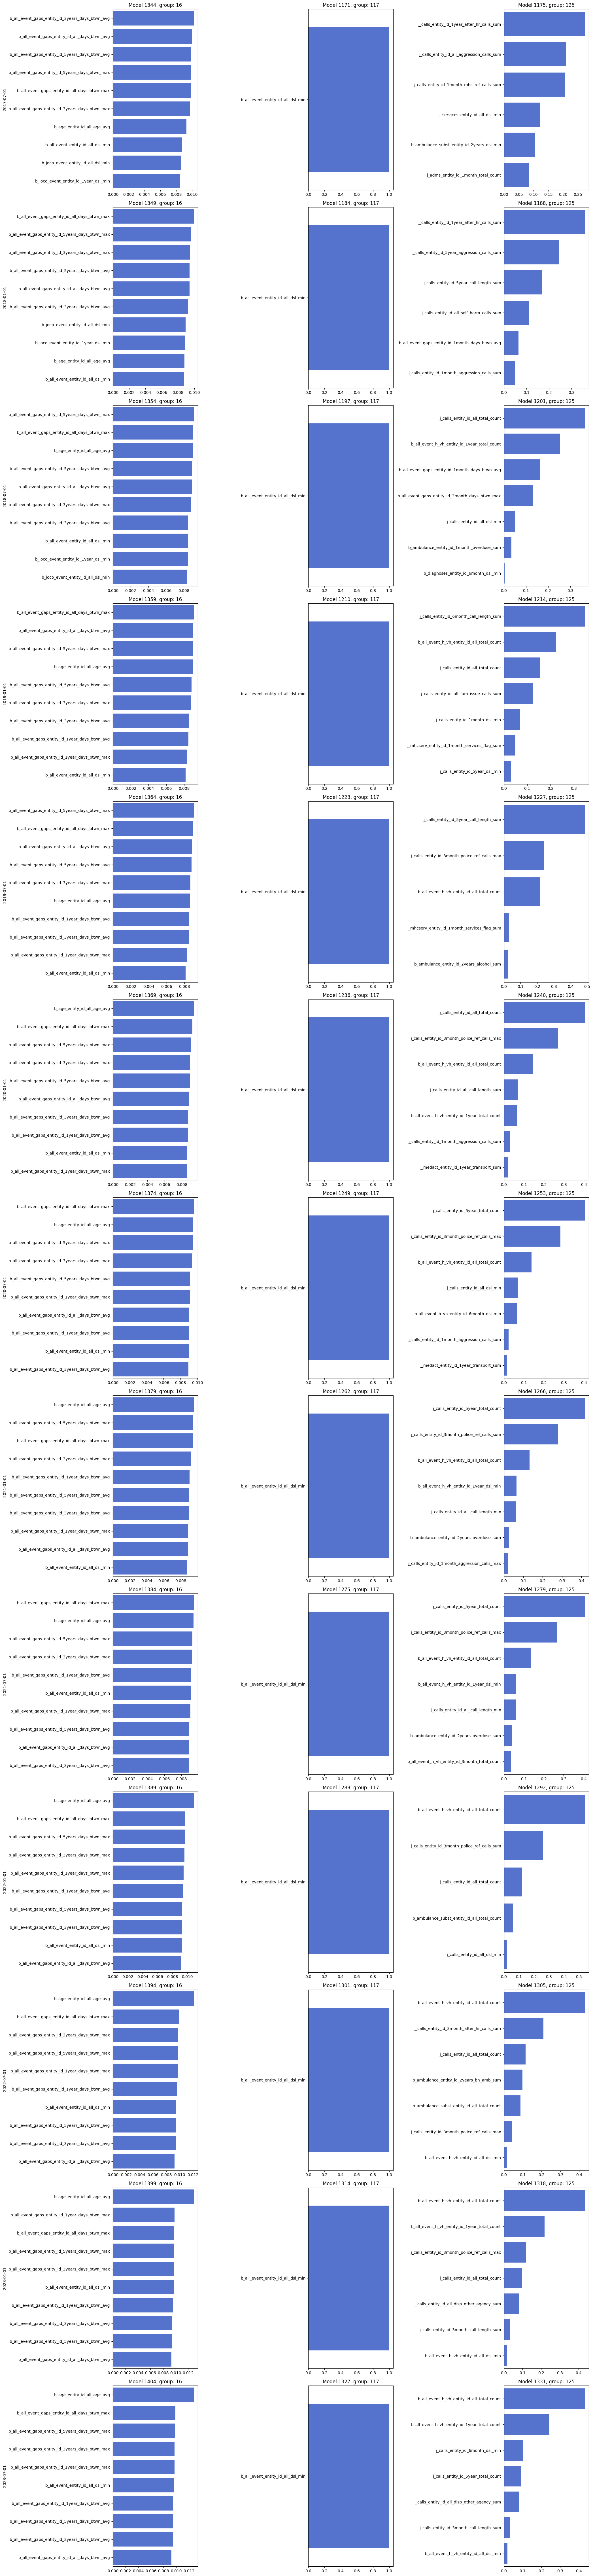

In [25]:
mma.plot_feature_importance(n_top_features=10)

### 5. Top k lists

2025-11-12 21:16:07 -    INFO Performing 3 comparisons
2025-11-12 21:16:07 -    INFO Comparing 16 and 117
2025-11-12 21:16:07 -    INFO Comparing 16 and 125
2025-11-12 21:16:07 -    INFO Comparing 117 and 125


2025-11-12 21:16:08 -    INFO Performing 3 comparisons
2025-11-12 21:16:08 -    INFO Comparing 16 and 117
2025-11-12 21:16:08 -    INFO Comparing 16 and 125
2025-11-12 21:16:08 -    INFO Comparing 117 and 125
2025-11-12 21:16:08 -    INFO Performing 3 comparisons
2025-11-12 21:16:08 -    INFO Comparing 16 and 117
2025-11-12 21:16:08 -    INFO Comparing 16 and 125
2025-11-12 21:16:08 -    INFO Comparing 117 and 125
2025-11-12 21:16:08 -    INFO Performing 3 comparisons
2025-11-12 21:16:08 -    INFO Comparing 16 and 117
2025-11-12 21:16:08 -    INFO Comparing 16 and 125
2025-11-12 21:16:08 -    INFO Comparing 117 and 125
2025-11-12 21:16:09 -    INFO Performing 3 comparisons
2025-11-12 21:16:09 -    INFO Comparing 16 and 117
2025-11-12 21:16:09 -    INFO Comparing 16 and 125
2025-11-12 21:16:09 -    INFO Comparing 117 and 125
2025-11-12 21:16:09 -    INFO Performing 3 comparisons
2025-11-12 21:16:09 -    INFO Comparing 16 and 117
2025-11-12 21:16:09 -    INFO Comparing 16 and 125
2025-11

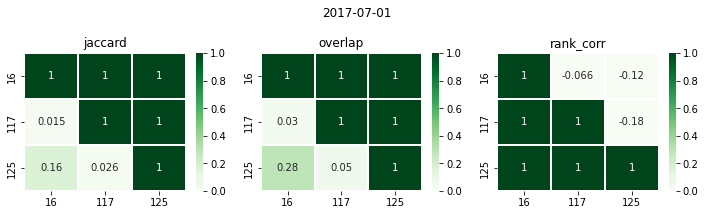

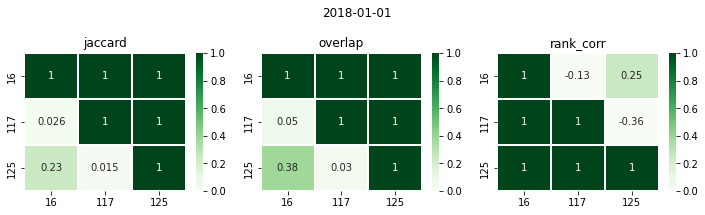

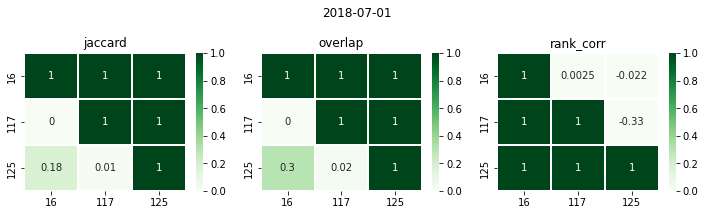

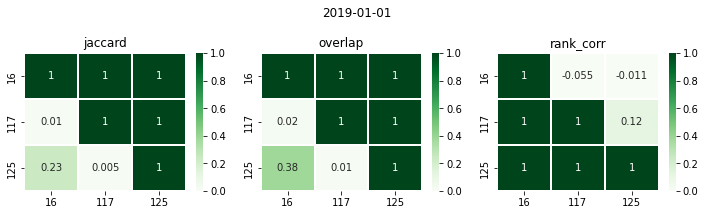

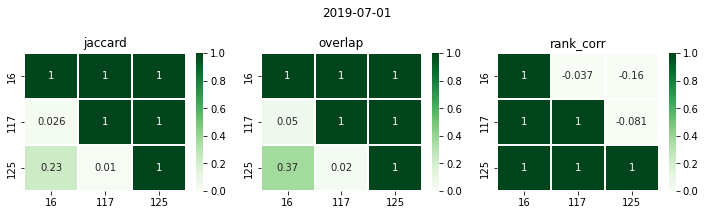

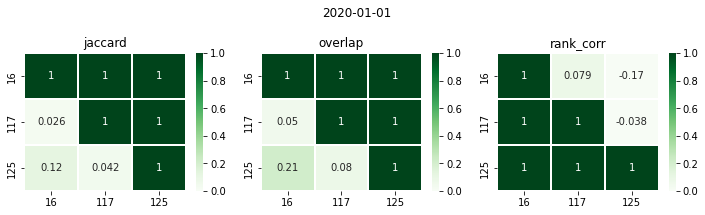

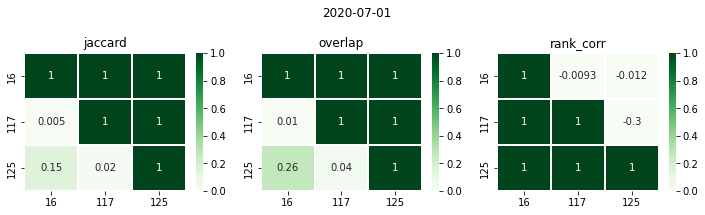

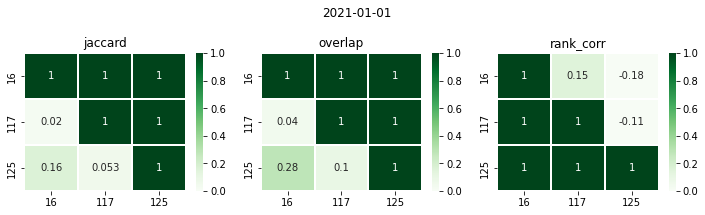

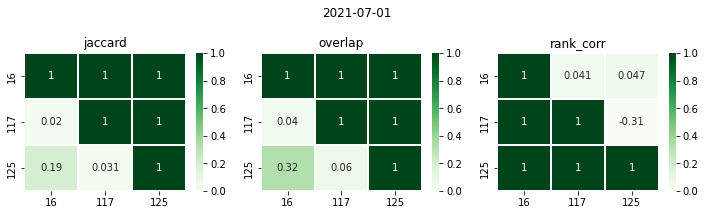

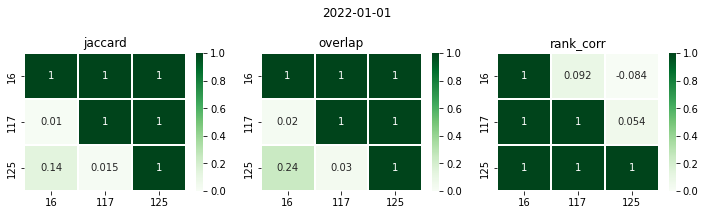

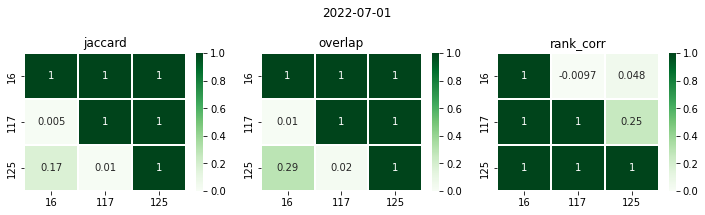

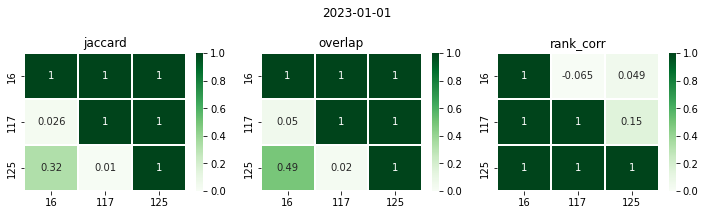

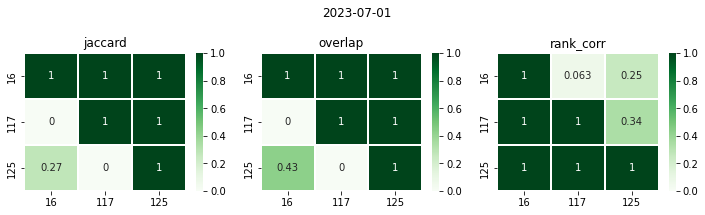

In [26]:
mma.pairwise_top_k_list_comparison(threshold_type='rank_abs_no_ties', threshold='100')

### 6. Crosstabs

In [31]:
# in case crosstabs have not been generated
thresholds = {'rank_abs_no_ties': 100} 
mma.calculate_crosstabs_pos_vs_neg(project_path, thresholds, replace=False)

2025-11-12 21:18:48 - WARNING Crosstabs aleady exist for model 1344 and matrix_uuid=7cf9e79bdcd3016de726cb5fd8c596a5
2025-11-12 21:18:48 -    INFO Replace set to False. Not calculating crosstabs for model 1344 and matrix_uuid='7cf9e79bdcd3016de726cb5fd8c596a5';
2025-11-12 21:18:49 - WARNING Crosstabs aleady exist for model 1349 and matrix_uuid=79fe4ee54a1e462acb0e3dc1d44cacb9
2025-11-12 21:18:49 -    INFO Replace set to False. Not calculating crosstabs for model 1349 and matrix_uuid='79fe4ee54a1e462acb0e3dc1d44cacb9';
2025-11-12 21:18:50 - WARNING Crosstabs aleady exist for model 1354 and matrix_uuid=db8feadb6d2e983afa8a12a308d6349f
2025-11-12 21:18:50 -    INFO Replace set to False. Not calculating crosstabs for model 1354 and matrix_uuid='db8feadb6d2e983afa8a12a308d6349f';
2025-11-12 21:18:51 - WARNING Crosstabs aleady exist for model 1359 and matrix_uuid=1797ae01ada3a0b4a39d6d489ecf5fa1
2025-11-12 21:18:51 -    INFO Replace set to False. Not calculating crosstabs for model 1359 and 

In [32]:
mma.display_crosstab_pos_vs_neg(threshold_type='rank_abs_no_ties', threshold=100)


Model Group: 16, Validation date: 2017-07-01


(-)mean    (+)mean  \
feature_name                                                               
b_joco_event_entity_id_6month_dsl_imp                0.430695   0.000000   
b_joco_event_entity_id_6month_dsl_min           430735.437500   7.320000   
b_joco_event_entity_id_1year_dsl_min             59069.710938   7.320000   
b_joco_event_entity_id_all_dsl_min               54554.835938   7.320000   
j_mhcserv_entity_id_1month_crisis_sum                0.000551   0.220000   
j_calls_entity_id_all_cope_calls_sum                 0.069989  27.000000   
j_calls_entity_id_5year_cope_calls_sum               0.069989  27.000000   
j_calls_entity_id_1year_cope_calls_sum               0.032152  11.420000   
j_calls_entity_id_6month_cope_calls_sum              0.018770   6.550000   
j_calls_entity_id_1month_hosp_ref_calls_sum          0.001580   0.550000   
j_calls_entity_id_1month_cope_calls_sum              0.003468   1.130000   
j_calls_entity_id_1month_screening_calls_max         0.000414   0.130000   
j_calls_entity_id_1month_disp_screening_max          0.000350   0.110000   
j_calls_entity_id_1month_disp_screening_sum          0.000445   0.140000   
j_calls_entity_id_5year_disp_no_response_sum         0.139140  43.419998   
j_calls_entity_id_all_disp_no_response_sum           0.139140  43.419998   
j_calls_entity_id_6month_self_ref_calls_sum          0.037974  11.530000   
j_calls_entity_id_1month_self_ref_calls_sum          0.005673   1.710000   
b_ambulance_subst_entity_id_1month_total_count       0.000986   0.290000   
j_calls_entity_id_3month_disp_screening_sum          0.001273   0.370000   
j_calls_entity_id_1month_screening_calls_sum         0.000456   0.130000   
j_calls_entity_id_1month_aggression_calls_sum        0.002100   0.590000   
j_calls_entity_id_3month_self_ref_calls_sum          0.018070   4.940000   
j_calls_entity_id_3month_cope_calls_sum              0.010774   2.930000   
j_calls_entity_id_1month_call_length_sum             0.308724  83.864998   
j_calls_entity_id_1year_self_ref_calls_sum           0.078355  21.139999   
j_calls_entity_id_5year_self_ref_calls_sum           0.190422  51.250000   
j_calls_entity_id_all_self_ref_calls_sum             0.190422  51.250000   
j_calls_entity_id_1month_mhc_ref_calls_sum           0.001241   0.330000   
j_calls_entity_id_5year_after_hr_calls_sum           0.193752  51.320000   
j_calls_entity_id_all_after_hr_calls_sum             0.193752  51.320000   
j_calls_entity_id_1year_disp_no_response_sum         0.072958  19.240000   
j_calls_entity_id_3month_screening_calls_sum         0.001209   0.310000   
j_calls_entity_id_6month_disp_no_response_sum        0.043266  11.080000   
b_ambulance_entity_id_1month_drug_use_sum            0.000636   0.160000   
j_calls_entity_id_1month_mhc_ref_calls_max           0.000838   0.210000   
b_ambulance_entity_id_1month_drug_use_max            0.000604   0.150000   
j_calls_entity_id_1month_disp_no_response_sum        0.008855   2.190000   
j_mhcserv_entity_id_1month_crisis_max                0.000530   0.130000   
j_calls_entity_id_1month_after_hr_calls_sum          0.012365   2.960000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_joco_event_entity_id_6month_dsl_imp                    inf    0.431     0.00  
b_joco_event_entity_id_6month_dsl_min           5.884364e+04    1.000     1.00  
b_joco_event_entity_id_1year_dsl_min            8.069633e+03    1.000     1.00  
b_joco_event_entity_id_all_dsl_min              7.452846e+03    1.000     1.00  
j_mhcserv_entity_id_1month_crisis_sum           3.989658e+02    0.001     0.13  
j_calls_entity_id_all_cope_calls_sum            3.857768e+02    0.034     0.71  
j_calls_entity_id_5year_cope_calls_sum          3.857768e+02    0.034     0.71  
j_calls_entity_id_1year_cope_calls_sum          3.551839e+02    0.020     0.64  
j_calls_entity_id_6month_cope_calls_sum         3.4


Model Group: 16, Validation date: 2018-01-01


(-)mean    (+)mean  \
feature_name                                                                
b_all_event_gaps_entity_id_all_days_btwn_min        236.354401   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.210584   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.210584   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.210168   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     249.584351   0.000000   
j_calls_entity_id_all_call_length_imp                 0.845685   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     236.354401   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.210168   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.210168   0.000000   
j_calls_entity_id_5year_call_length_imp               0.845685   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.210168   0.000000   
j_calls_entity_id_all_dsl_imp                         0.845675   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.210168   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.210168   0.000000   
j_calls_entity_id_5year_dsl_imp                       0.845675   0.000000   
j_calls_entity_id_5year_call_length_min          845685.625000   1.660000   
j_calls_entity_id_all_call_length_min            845685.625000   1.660000   
j_calls_entity_id_all_dsl_min                    845727.562500  38.040001   
j_calls_entity_id_5year_dsl_min                  845727.562500  38.040001   
b_joco_event_entity_id_1year_dsl_min              61271.042969  15.320000   
b_joco_event_entity_id_all_dsl_min                57178.652344  15.320000   
b_all_event_gaps_entity_id_1year_days_btwn_min      279.114136   0.370000   
j_calls_entity_id_1month_hosp_ref_calls_sum           0.001770   0.690000   
j_calls_entity_id_all_cope_calls_sum                  0.084074  31.610001   
j_calls_entity_id_5year_cope_calls_sum                0.084074  31.610001   
j_calls_entity_id_6month_cope_calls_sum               0.017651   5.890000   
j_calls_entity_id_1month_disp_screening_sum           0.000395   0.130000   
j_calls_entity_id_1month_cope_calls_sum               0.002698   0.850000   
j_calls_entity_id_1month_disp_screening_max           0.000352   0.110000   
j_calls_entity_id_3month_cope_calls_sum               0.008010   2.480000   
j_calls_entity_id_1month_site_visit_calls_sum         0.001205   0.370000   
j_calls_entity_id_1year_cope_calls_sum                0.037808  11.200000   
j_calls_entity_id_3month_hosp_ref_calls_sum           0.005738   1.690000   
j_calls_entity_id_all_disp_no_response_sum            0.177767  51.759998   
j_calls_entity_id_5year_disp_no_response_sum          0.177767  51.759998   
j_calls_entity_id_3month_mood_calls_sum               0.001386   0.380000   
j_calls_entity_id_3month_site_visit_calls_sum         0.004821   1.320000   
j_calls_entity_id_5year_self_ref_calls_sum            0.210797  57.209999   
j_calls_entity_id_all_self_ref_calls_sum              0.210797  57.209999   
j_calls_entity_id_6month_self_ref_calls_sum           0.035206   9.060000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_all_days_btwn_min              inf    0.395   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.211   
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.211   
b_all_event_gaps_entity_id_5years_days_btw_imp            inf    0.210   
b_all_event_gaps_entity_id_3years_days_btwn_min           inf    0.407   
j_calls_entity_id_all_call_length_imp                     inf    0.846   
b_all_event_gaps_entity_id_5years_days_btwn_min           inf    0.395   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.210   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.210   
j_call


Model Group: 16, Validation date: 2018-07-01


(-)mean     (+)mean  \
feature_name                                                                 
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.669027    0.000000   
j_calls_entity_id_all_dsl_imp                         0.836108    0.000000   
j_calls_entity_id_all_call_length_imp                 0.836118    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.206986    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        226.423294    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.211659    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.211659    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.206986    0.000000   
j_calls_entity_id_1year_call_length_imp               0.892099    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min      274.914459    0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.494855    0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.494855    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     226.423294    0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_min     219.291290    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.206986    0.000000   
b_joco_event_entity_id_3month_dsl_imp                 0.633078    0.000000   
j_calls_entity_id_5year_dsl_imp                       0.836108    0.000000   
j_calls_entity_id_1year_dsl_imp                       0.892088    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     245.559509    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.206986    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.206986    0.000000   
b_joco_event_entity_id_6month_dsl_imp                 0.424544    0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.669027    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.206986    0.000000   
j_calls_entity_id_5year_call_length_imp               0.836118    0.000000   
j_calls_entity_id_all_call_length_min            836118.375000    1.925000   
j_calls_entity_id_5year_call_length_min          836118.375000    1.925000   
j_calls_entity_id_1year_call_length_min          892098.937500    2.755000   
b_joco_event_entity_id_3month_dsl_min            633090.375000    6.450000   
b_joco_event_entity_id_6month_dsl_min            424585.125000    6.450000   
j_calls_entity_id_1year_dsl_min                  892104.562500   28.410000   
j_calls_entity_id_5year_dsl_min                  836166.375000   28.410000   
j_calls_entity_id_all_dsl_min                    836166.375000   28.410000   
b_joco_event_entity_id_1year_dsl_min              70012.835938    6.450000   
b_joco_event_entity_id_all_dsl_min                60973.652344    6.450000   
b_all_event_gaps_entity_id_3month_days_btwn_min     181.269775    0.020000   
j_calls_entity_id_6month_call_length_max              1.416657  788.104980   
j_calls_entity_id_6month_call_length_sum              2.342551  988.090027   
j_calls_entity_id_1month_mhc_ref_calls_sum            0.000540    0.190000   
j_calls_entity_id_1year_call_length_max               2.428038  808.015015   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_3month_days_btwn_imp           inf    0.669   
j_calls_entity_id_all_dsl_imp                             inf    0.836   
j_calls_entity_id_all_call_length_imp                     inf    0.836   
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.207   
b_all_event_gaps_entity_id_all_days_btwn_min              inf    0.383   
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.212   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.212   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.207   
j_calls_entity_id_1year_call_length_im


Model Group: 16, Validation date: 2019-01-01


(-)mean    (+)mean  \
feature_name                                                                
j_calls_entity_id_all_call_length_imp                 0.826147   0.000000   
j_calls_entity_id_5year_call_length_imp               0.826147   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     223.340363   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.204700   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.204264   0.000000   
j_calls_entity_id_all_dsl_imp                         0.826137   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.204264   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        223.340363   0.000000   
j_calls_entity_id_5year_dsl_imp                       0.826137   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.477945   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min      276.797729   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.204264   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.204264   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     248.786774   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.204264   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.204264   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.204700   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.477945   0.000000   
b_joco_event_entity_id_6month_dsl_imp                 0.403992   0.000000   
j_calls_entity_id_5year_call_length_min          826148.000000   1.935000   
j_calls_entity_id_all_call_length_min            826148.000000   1.935000   
b_joco_event_entity_id_6month_dsl_min            404036.781250   8.630000   
j_calls_entity_id_5year_dsl_min                  826204.437500  32.009998   
j_calls_entity_id_all_dsl_min                    826204.437500  32.009998   
b_joco_event_entity_id_1year_dsl_min              67230.187500   8.630000   
b_joco_event_entity_id_all_dsl_min                62353.535156   8.630000   
j_calls_entity_id_1month_disp_screening_sum           0.000365   0.160000   
j_calls_entity_id_1month_aggression_calls_sum         0.001532   0.630000   
j_calls_entity_id_1month_screening_calls_sum          0.000396   0.160000   
j_calls_entity_id_1month_hosp_ref_calls_sum           0.001563   0.610000   
j_calls_entity_id_3month_disp_screening_sum           0.001147   0.390000   
j_calls_entity_id_1month_disp_screening_max           0.000325   0.110000   
j_calls_entity_id_3month_disp_mcrt_sum                0.002070   0.700000   
j_calls_entity_id_1month_site_visit_calls_sum         0.001563   0.520000   
j_calls_entity_id_1month_screening_calls_max          0.000365   0.120000   
j_calls_entity_id_3month_jdc_ref_calls_sum            0.001613   0.520000   
j_calls_entity_id_1month_fam_issue_calls_sum          0.000507   0.160000   
j_calls_entity_id_3month_hosp_ref_calls_sum           0.004810   1.480000   
j_calls_entity_id_1month_disp_jcmhc_sum               0.001776   0.540000   
j_calls_entity_id_1month_fam_issue_calls_max          0.000396   0.120000   

                                                        ratio  (-)supp  \
feature_name                                                             
j_calls_entity_id_all_call_length_imp                     inf    0.826   
j_calls_entity_id_5year_call_length_imp                   inf    0.826   
b_all_event_gaps_entity_id_5years_days_btwn_min           inf    0.381   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.205   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.204   
j_calls_entity_id_all_dsl_imp                             inf    0.826   
b_all_event_gaps_entity_id_5years_days_btw_imp            inf    0.204   
b_all_event_gaps_entity_id_all_days_btwn_min              inf    0.381   
j_calls_entity_id_5year_dsl_imp                           inf    0.826   
b_all_


Model Group: 16, Validation date: 2019-07-01


(-)mean     (+)mean  \
feature_name                                                                
b_all_event_gaps_entity_id_3years_days_btwn_min    254.103180    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp        0.212905    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp       0.212548    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min       222.934372    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp      0.212548    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp       0.212905    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min    227.940125    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp          0.212548    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp       0.212548    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp      0.212548    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp         0.212548    0.000000   
b_joco_event_entity_id_1year_dsl_min             83072.804688    8.660000   
b_joco_event_entity_id_all_dsl_min               77110.625000    8.660000   
j_calls_entity_id_3month_call_length_max             0.717356  440.274994   
j_calls_entity_id_3month_call_length_sum             1.099944  554.911011   
j_calls_entity_id_6month_call_length_max             1.338148  455.105011   
j_mhcserv_entity_id_1month_crisis_sum                0.000565    0.190000   
j_calls_entity_id_1month_cope_calls_sum              0.003113    1.030000   
j_calls_entity_id_6month_call_length_sum             2.186273  690.276001   
j_calls_entity_id_3month_self_ref_calls_sum          0.017854    5.580000   
j_calls_entity_id_1month_disp_jcmhc_sum              0.002131    0.650000   
j_calls_entity_id_1month_self_ref_calls_sum          0.005522    1.680000   
j_mhcserv_entity_id_1month_crisis_max                0.000466    0.140000   
j_calls_entity_id_6month_self_ref_calls_sum          0.035162   10.480000   
j_calls_entity_id_3month_cope_calls_sum              0.011033    3.260000   
j_calls_entity_id_6month_cope_calls_sum              0.022473    6.550000   
j_calls_entity_id_3month_disp_jcmhc_sum              0.007395    2.080000   
j_calls_entity_id_5year_cope_calls_sum               0.125263   34.860001   
j_calls_entity_id_all_cope_calls_sum                 0.127146   35.000000   
j_calls_entity_id_1year_cope_calls_sum               0.045184   11.640000   
j_calls_entity_id_6month_disp_jcmhc_sum              0.015167    3.870000   
j_calls_entity_id_1year_self_ref_calls_sum           0.070116   17.670000   
j_calls_entity_id_3month_mood_calls_sum              0.001180    0.290000   
j_calls_entity_id_1month_after_hr_calls_sum          0.011202    2.700000   
j_calls_entity_id_1month_aggression_calls_sum        0.001715    0.400000   
j_calls_entity_id_1month_self_harm_calls_sum         0.001824    0.410000   
j_calls_entity_id_5year_self_ref_calls_sum           0.254045   56.400002   
j_calls_entity_id_all_self_ref_calls_sum             0.258942   57.000000   
j_calls_entity_id_3month_after_hr_calls_sum          0.036936    7.980000   
j_calls_entity_id_1month_disp_no_response_sum        0.008218    1.760000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_3years_days_btwn_min          inf    0.414     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp            inf    0.213     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.213     0.00  
b_all_event_gaps_entity_id_all_days_btwn_min             inf    0.390     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.213     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.213     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min          inf    0.393     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.213     0.00  
b_all_eve


Model Group: 16, Validation date: 2020-01-01


(-)mean    (+)mean  \
feature_name                                                              
j_calls_entity_id_1month_aggression_calls_sum       0.001691   0.480000   
j_calls_entity_id_1month_self_ref_calls_sum         0.006699   1.870000   
j_adms_entity_id_1month_program_category_youth_max  0.000439   0.110000   
j_adms_entity_id_1month_program_category_youth_sum  0.000439   0.110000   
j_calls_entity_id_1month_cope_calls_sum             0.005326   1.290000   
j_calls_entity_id_3month_fam_issue_calls_sum        0.001523   0.360000   
j_calls_entity_id_1month_disp_jcmhc_sum             0.002326   0.540000   
j_calls_entity_id_3month_self_ref_calls_sum         0.021657   5.000000   
j_calls_entity_id_3month_cope_calls_sum             0.014893   3.360000   
j_calls_entity_id_3month_mhc_ref_calls_sum          0.001719   0.370000   
j_calls_entity_id_1month_after_hr_calls_sum         0.013136   2.700000   
j_calls_entity_id_1month_disp_no_response_sum       0.010137   2.020000   
j_calls_entity_id_6month_disp_jcmhc_sum             0.014024   2.780000   
j_calls_entity_id_1month_hosp_ref_calls_sum         0.000860   0.170000   
j_calls_entity_id_6month_self_ref_calls_sum         0.041390   8.060000   
j_calls_entity_id_1month_site_visit_calls_sum       0.001850   0.360000   
j_calls_entity_id_3month_disp_jcmhc_sum             0.006400   1.210000   
j_calls_entity_id_6month_cope_calls_sum             0.027207   5.130000   
b_all_event_h_vh_entity_id_1month_total_count       0.003410   0.600000   
j_calls_entity_id_1month_aggression_calls_max       0.001261   0.220000   
j_calls_entity_id_3month_aggression_calls_sum       0.006073   1.050000   
j_calls_entity_id_1month_call_length_sum            0.372406  63.869999   
j_calls_entity_id_6month_fam_issue_calls_sum        0.003382   0.580000   
j_calls_entity_id_1month_disp_jcmhc_max             0.001822   0.310000   
j_calls_entity_id_1month_hosp_ref_calls_max         0.000654   0.110000   
j_calls_entity_id_3month_after_hr_calls_sum         0.040325   6.710000   
b_ambulance_subst_entity_id_1month_total_count      0.001084   0.180000   
j_calls_entity_id_3month_screening_calls_sum        0.000850   0.140000   
j_calls_entity_id_3month_disp_no_response_sum       0.031393   5.160000   
j_calls_entity_id_1month_self_harm_calls_sum        0.002149   0.350000   
j_mhcserv_entity_id_6month_crisis_sum               0.003279   0.530000   
j_calls_entity_id_6month_mhc_ref_calls_sum          0.002934   0.470000   
j_calls_entity_id_3month_hosp_ref_calls_sum         0.002635   0.420000   
j_calls_entity_id_1month_total_count                0.025180   3.970000   
j_calls_entity_id_1year_fam_issue_calls_sum         0.007129   1.110000   
j_calls_entity_id_1year_disp_jcmhc_sum              0.030197   4.590000   
j_calls_entity_id_1year_self_ref_calls_sum          0.080453  12.140000   
j_calls_entity_id_6month_aggression_calls_sum       0.011735   1.770000   
b_ambulance_entity_id_3month_alcohol_sum            0.003130   0.470000   
j_calls_entity_id_3month_screening_calls_max        0.000738   0.110000   

                                                         ratio  (-)supp  \
feature_name                                                              
j_calls_entity_id_1month_aggression_calls_sum       283.839111    0.001   
j_calls_entity_id_1month_self_ref_calls_sum         279.146393    0.004   
j_adms_entity_id_1month_program_category_youth_max  250.498077    0.000   
j_adms_entity_id_1month_program_category_youth_sum  250.498077    0.000   
j_calls_entity_id_1month_cope_calls_sum             242.228043    0.004   
j_calls_entity_id_3month_fam_issue_calls_sum        236.387497    0.001   
j_calls_entity_id_1month_disp_jcmhc_sum             232.115417    0.002   
j_calls_entity_id_3month_self_ref_calls_sum         230.869278    0.012   
j_calls_entity_id_3month_cope_calls_sum             225.611130    0.009   
j_calls_entity_id_3month_mhc_ref_calls_sum          215.225388    0.001   
j_


Model Group: 16, Validation date: 2020-07-01


(-)mean  (+)mean  \
feature_name                                                         
b_all_event_gaps_entity_id_3years_days_btw_imp   0.202764     0.00   
b_all_event_gaps_entity_id_3month_days_btwn_imp  0.727249     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp     0.202764     0.00   
b_all_event_gaps_entity_id_3month_days_btw_imp   0.727249     0.00   
b_all_event_gaps_entity_id_6month_days_btwn_imp  0.501757     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp   0.203085     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp  0.202764     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp      0.202764     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp  0.202764     0.00   
b_all_event_gaps_entity_id_6month_days_btw_imp   0.501757     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp    0.203085     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp   0.202764     0.00   
j_mhcserv_entity_id_1month_crisis_sum            0.000330     0.19   
j_calls_entity_id_1month_screening_calls_sum     0.000241     0.12   
j_calls_entity_id_1month_disp_jcmhc_sum          0.002693     1.34   
j_calls_entity_id_1month_screening_calls_max     0.000223     0.11   
j_calls_entity_id_1month_anxiety_calls_sum       0.001436     0.67   
j_mhcserv_entity_id_1month_crisis_max            0.000267     0.12   
j_calls_entity_id_1month_aggression_calls_sum    0.001275     0.56   
j_calls_entity_id_3month_disp_screening_sum      0.000580     0.24   
j_calls_entity_id_3month_screening_calls_sum     0.000588     0.24   
j_calls_entity_id_1month_hosp_ref_calls_sum      0.001141     0.45   
j_calls_entity_id_3month_hosp_ref_calls_sum      0.002523     0.98   
j_calls_entity_id_3month_disp_mcrt_sum           0.001222     0.47   
j_calls_entity_id_3month_fam_issue_calls_sum     0.001596     0.60   
j_calls_entity_id_3month_disp_jcmhc_sum          0.008569     3.21   
j_calls_entity_id_1month_fam_issue_calls_sum     0.000606     0.22   
j_calls_entity_id_3month_aggression_calls_sum    0.004191     1.45   
j_calls_entity_id_6month_disp_jcmhc_sum          0.014418     4.98   
j_calls_entity_id_1month_self_ref_calls_sum      0.009817     3.35   
j_calls_entity_id_3month_anxiety_calls_sum       0.003968     1.26   
j_calls_entity_id_6month_fam_issue_calls_sum     0.003148     0.97   
j_calls_entity_id_1month_aggression_calls_max    0.001016     0.31   
j_calls_entity_id_1month_after_hr_calls_sum      0.014793     4.43   
j_calls_entity_id_3month_screening_calls_max     0.000544     0.16   
j_calls_entity_id_1month_fam_issue_calls_max     0.000481     0.14   
j_calls_entity_id_3month_self_ref_calls_sum      0.026625     7.59   
j_calls_entity_id_1month_site_visit_calls_sum    0.001248     0.35   
j_calls_entity_id_1month_disp_jcmhc_max          0.002104     0.58   
j_calls_entity_id_3month_site_visit_calls_sum    0.002791     0.74   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_3years_days_btw_imp          inf    0.203     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp         inf    0.727     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp            inf    0.203     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp          inf    0.727     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp         inf    0.502     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp          inf    0.203     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp         inf    0.203     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp             inf    0.203     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp         inf    0.203     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp          inf    0.502     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp           inf    0.203     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.203 


Model Group: 16, Validation date: 2021-01-01


(-)mean     (+)mean  \
feature_name                                                              
b_all_event_gaps_entity_id_all_days_btw_imp        0.190367    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.191779    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.190367    0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp     0.494223    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp       0.190367    0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp    0.494223    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.190367    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.190367    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp     0.190367    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.191779    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min   244.848587    0.030000   
b_all_event_gaps_entity_id_3years_days_btwn_min  221.556366    0.030000   
b_all_event_gaps_entity_id_5years_days_btwn_min  202.157288    0.030000   
b_all_event_gaps_entity_id_all_days_btwn_min     184.661560    0.030000   
b_all_event_gaps_entity_id_6month_days_btwn_min  240.339661    0.040000   
j_calls_entity_id_1month_mood_calls_sum            0.000311    0.190000   
j_calls_entity_id_1month_mood_calls_max            0.000266    0.110000   
j_calls_entity_id_1month_disp_jcmhc_sum            0.002984    1.080000   
j_calls_entity_id_3month_mood_calls_sum            0.001163    0.400000   
j_mhcserv_entity_id_6month_crisis_sum              0.001945    0.650000   
j_calls_entity_id_1month_call_length_sum           0.402237  130.845001   
j_calls_entity_id_6month_fam_issue_calls_sum       0.003774    1.220000   
j_calls_entity_id_1month_fam_issue_calls_sum       0.000746    0.240000   
j_calls_entity_id_3month_fam_issue_calls_sum       0.002034    0.650000   
j_calls_entity_id_3month_self_ref_calls_sum        0.028817    8.400000   
j_calls_entity_id_1month_self_ref_calls_sum        0.009990    2.840000   
j_calls_entity_id_1month_call_length_max           0.284005   80.010002   
j_calls_entity_id_3month_disp_jcmhc_sum            0.009351    2.600000   
j_calls_entity_id_1month_after_hr_calls_sum        0.014972    4.160000   
j_mhcserv_entity_id_1year_crisis_sum               0.004138    1.110000   
j_calls_entity_id_6month_disp_jcmhc_sum            0.019412    5.170000   
j_calls_entity_id_1year_fam_issue_calls_sum        0.007166    1.900000   
j_calls_entity_id_6month_mood_calls_sum            0.002753    0.720000   
j_calls_entity_id_6month_self_ref_calls_sum        0.061718   16.120001   
j_calls_entity_id_1month_disp_no_response_sum      0.011411    2.910000   
j_calls_entity_id_3month_hosp_ref_calls_sum        0.002611    0.660000   
j_calls_entity_id_3month_after_hr_calls_sum        0.044694   10.960000   
j_calls_entity_id_6month_after_hr_calls_sum        0.089726   21.280001   
j_calls_entity_id_3month_disp_no_response_sum      0.033585    7.940000   
j_calls_entity_id_1year_disp_jcmhc_sum             0.035335    8.340000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.190     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp            inf    0.192     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.190     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp           inf    0.494     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.190     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp          inf    0.494     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.190     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.190     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.190     0.00  
b_all_even


Model Group: 16, Validation date: 2021-07-01


(-)mean  (+)mean  \
feature_name                                                           
b_all_event_gaps_entity_id_3years_days_btw_imp     0.136462     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.136462     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp        0.136462     0.00   
b_all_event_gaps_entity_id_6month_days_btw_imp     0.291375     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp       0.136462     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.136462     0.00   
b_all_event_gaps_entity_id_6month_days_btwn_imp    0.291375     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.137271     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.136462     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.137271     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_min   154.426193     0.03   
b_all_event_gaps_entity_id_3years_days_btwn_min  140.072723     0.03   
b_all_event_gaps_entity_id_5years_days_btwn_min  128.791595     0.03   
b_all_event_gaps_entity_id_all_days_btwn_min     116.141129     0.03   
j_calls_entity_id_1month_disp_jcmhc_sum            0.002314     2.65   
j_calls_entity_id_3month_disp_jcmhc_sum            0.007732     6.83   
b_ambulance_entity_id_3month_suicidal_sum          0.000278     0.23   
j_calls_entity_id_6month_disp_jcmhc_sum            0.015658    12.07   
j_calls_entity_id_1month_crisis_calls_sum          0.003089     1.98   
j_calls_entity_id_1year_disp_jcmhc_sum             0.027078    15.60   
b_ambulance_entity_id_6month_suicidal_sum          0.000663     0.38   
b_ambulance_entity_id_3month_suicidal_max          0.000273     0.15   
j_calls_entity_id_1month_aggression_calls_sum      0.000775     0.40   
j_calls_entity_id_3month_crisis_calls_sum          0.010041     5.18   
j_calls_entity_id_3month_mhc_ref_calls_sum         0.001583     0.81   
j_calls_entity_id_1year_crisis_calls_sum           0.020072     9.93   
j_calls_entity_id_6month_crisis_calls_sum          0.020072     9.93   
j_calls_entity_id_5year_crisis_calls_sum           0.020072     9.93   
j_calls_entity_id_all_crisis_calls_sum             0.020072     9.93   
b_all_event_gaps_entity_id_6month_days_btwn_min  122.690689     0.26   
b_ambulance_entity_id_1month_alcohol_sum           0.000580     0.27   
j_calls_entity_id_3month_homeless_calls_sum        0.001252     0.58   
j_calls_entity_id_1month_mhc_ref_calls_sum         0.000502     0.23   
b_ambulance_entity_id_6month_alcohol_sum           0.003279     1.47   
b_ambulance_entity_id_3month_alcohol_sum           0.001637     0.72   
b_ambulance_entity_id_1year_suicidal_sum           0.001345     0.59   
j_calls_entity_id_1month_after_hr_calls_sum        0.006577     2.88   
j_calls_entity_id_1month_disp_jcmhc_max            0.001272     0.55   
j_calls_entity_id_1month_self_ref_calls_sum        0.003571     1.54   
j_calls_entity_id_1month_aggression_calls_max      0.000565     0.24   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.136     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.136     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.136     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp           inf    0.291     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.136     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.136     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp          inf    0.291     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.137     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.136     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp            inf    0.137     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_min   5147.5


Model Group: 16, Validation date: 2022-01-01


(-)mean     (+)mean  \
feature_name                                                            
b_all_event_gaps_entity_id_1year_days_btw_imp    0.163257    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp   0.163257    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp   0.162939    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp     0.162939    0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp  0.649445    0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp   0.649445    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp   0.162939    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp  0.162939    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp  0.162939    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp      0.162939    0.000000   
j_calls_entity_id_1month_disp_jcmhc_sum          0.001538    2.470000   
j_calls_entity_id_1month_crisis_calls_sum        0.002719    3.880000   
j_calls_entity_id_1month_self_ref_calls_sum      0.002988    3.530000   
j_calls_entity_id_3month_disp_jcmhc_sum          0.004973    5.850000   
j_calls_entity_id_3month_crisis_calls_sum        0.008245    8.820000   
j_calls_entity_id_6month_disp_jcmhc_sum          0.011052   10.980000   
j_calls_entity_id_3month_self_ref_calls_sum      0.009284    8.050000   
j_calls_entity_id_6month_crisis_calls_sum        0.018214   15.220000   
j_calls_entity_id_1year_disp_jcmhc_sum           0.026622   19.930000   
j_calls_entity_id_1month_after_hr_calls_sum      0.004819    3.490000   
j_calls_entity_id_6month_self_ref_calls_sum      0.019686   13.380000   
j_calls_entity_id_1year_crisis_calls_sum         0.036649   24.580000   
j_calls_entity_id_all_crisis_calls_sum           0.036649   24.580000   
j_calls_entity_id_5year_crisis_calls_sum         0.036649   24.580000   
b_ambulance_entity_id_1month_alcohol_sum         0.000473    0.310000   
j_calls_entity_id_5year_self_ref_calls_sum       0.141463   79.809998   
j_calls_entity_id_all_self_ref_calls_sum         0.180919  102.029999   
b_ambulance_subst_entity_id_1month_total_count   0.000579    0.310000   
j_calls_entity_id_1month_disp_no_action_sum      0.003117    1.640000   
j_calls_entity_id_3month_after_hr_calls_sum      0.015756    8.260000   
j_calls_entity_id_1month_cope_calls_sum          0.010433    5.190000   
j_calls_entity_id_1year_self_ref_calls_sum       0.044823   21.889999   
j_calls_entity_id_1month_mhc_ref_calls_sum       0.000433    0.210000   
b_ambulance_entity_id_3month_alcohol_sum         0.001512    0.720000   
b_ambulance_entity_id_6month_psy_substance_sum   0.000340    0.160000   
j_calls_entity_id_5year_disp_jcmhc_sum           0.066980   31.290001   
j_calls_entity_id_all_disp_jcmhc_sum             0.072170   33.459999   
j_calls_entity_id_all_disp_no_response_sum       0.150128   67.620003   
j_calls_entity_id_1month_call_length_sum         0.182824   81.464996   
b_ambulance_entity_id_6month_alcohol_sum         0.003311    1.440000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_1year_days_btw_imp            inf    0.163     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.163     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.163     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.163     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp          inf    0.649     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp           inf    0.649     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.163     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.163     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.163     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.163     0.00  
j_calls_ent


Model Group: 16, Validation date: 2022-07-01


(-)mean    (+)mean  \
feature_name                                                             
b_all_event_gaps_entity_id_all_days_btwn_imp       0.218926   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp    0.564986   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min   282.247009   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min  223.625168   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.218926   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.218926   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min  241.174210   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.218926   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp        0.218926   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min     194.338333   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.220266   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.220266   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp     0.564986   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp     0.218926   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_min  229.058151   0.050000   
j_calls_entity_id_1month_disp_jcmhc_sum            0.002334   1.700000   
b_ambulance_entity_id_1month_alcohol_sum           0.000797   0.570000   
j_calls_entity_id_6month_disp_jcmhc_sum            0.014642  10.410000   
j_calls_entity_id_3month_disp_jcmhc_sum            0.007419   4.920000   
b_ambulance_entity_id_1month_suicidal_sum          0.000196   0.120000   
b_ambulance_subst_entity_id_1month_total_count     0.000954   0.580000   
j_calls_entity_id_1year_disp_jcmhc_sum             0.032558  18.930000   
j_calls_entity_id_6month_crisis_calls_sum          0.027695  15.740000   
b_ambulance_entity_id_1month_suicidal_max          0.000196   0.110000   
j_calls_entity_id_3month_crisis_calls_sum          0.014413   8.020000   
b_ambulance_entity_id_6month_alcohol_sum           0.004523   2.480000   
j_calls_entity_id_1month_crisis_calls_sum          0.004942   2.620000   
b_ambulance_entity_id_3month_alcohol_sum           0.002510   1.260000   
j_calls_entity_id_1year_crisis_calls_sum           0.057076  27.040001   
j_calls_entity_id_3month_disp_911_sum              0.000340   0.160000   
j_calls_entity_id_6month_self_ref_calls_sum        0.030192  13.670000   
b_ambulance_subst_entity_id_6month_total_count     0.005621   2.520000   
j_calls_entity_id_5year_disp_911_sum               0.000523   0.230000   
j_calls_entity_id_1year_disp_911_sum               0.000523   0.230000   
j_calls_entity_id_6month_disp_911_sum              0.000523   0.230000   
j_calls_entity_id_all_disp_911_sum                 0.000523   0.230000   
j_calls_entity_id_3month_self_ref_calls_sum        0.016158   6.760000   
b_ambulance_subst_entity_id_3month_total_count     0.003124   1.270000   
b_ambulance_entity_id_6month_suicidal_sum          0.001039   0.420000   
j_calls_entity_id_all_crisis_calls_sum             0.081961  32.490002   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.219     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp          inf    0.565     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_min           inf    0.532     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min          inf    0.470     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.219     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.219     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_min          inf    0.483     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.219     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.219     0.00  
b_all_event_gaps_entity_id_all_days_btwn_min        


Model Group: 16, Validation date: 2023-01-01


(-)mean    (+)mean  \
feature_name                                                                   
b_all_event_h_vh_entity_id_3month_total_imp              0.918099   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp              0.204297   0.000000   
b_all_event_h_vh_entity_id_1year_total_imp               0.918099   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp             0.204297   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp          0.501662   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp           0.204297   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min           173.366852   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min        222.704315   0.000000   
b_all_event_h_vh_entity_id_all_total_imp                 0.918099   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp          0.204297   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp           0.501662   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min        204.329178   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp            0.204784   0.000000   
b_all_event_h_vh_entity_id_all_dsl_imp                   0.918099   0.000000   
b_all_event_h_vh_entity_id_1month_total_imp              0.918099   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp           0.204784   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp          0.204297   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp           0.204297   0.000000   
b_all_event_h_vh_entity_id_6month_total_imp              0.918099   0.000000   
b_all_event_h_vh_entity_id_all_dsl_min              918158.375000  93.269997   
j_calls_entity_id_3month_crisis_calls_sum                0.016690  17.660000   
j_calls_entity_id_1month_crisis_calls_sum                0.005253   5.500000   
j_calls_entity_id_1month_self_ref_calls_sum              0.005362   5.280000   
j_calls_entity_id_3month_self_ref_calls_sum              0.017308  16.520000   
j_calls_entity_id_6month_crisis_calls_sum                0.035352  31.980000   
j_calls_entity_id_1month_disp_jcmhc_sum                  0.002314   2.090000   
j_calls_entity_id_3month_disp_jcmhc_sum                  0.007996   6.830000   
j_calls_entity_id_6month_disp_jcmhc_sum                  0.017345  13.410000   
j_calls_entity_id_6month_self_ref_calls_sum              0.037789  29.200001   
j_calls_entity_id_1year_crisis_calls_sum                 0.065654  48.290001   
j_calls_entity_id_1year_disp_jcmhc_sum                   0.033940  23.260000   
j_calls_entity_id_1year_self_ref_calls_sum               0.070769  43.639999   
j_calls_entity_id_5year_crisis_calls_sum                 0.114022  68.580002   
j_calls_entity_id_all_crisis_calls_sum                   0.114022  68.580002   
j_calls_entity_id_1month_disp_no_action_sum              0.005908   3.460000   
j_calls_entity_id_3month_disp_no_action_sum              0.017498  10.110000   
j_calls_entity_id_3month_after_hr_calls_sum              0.030783  15.470000   
j_calls_entity_id_1month_after_hr_calls_sum              0.009545   4.670000   
j_mhccsassess_entity_id_6month_nonsuic_self_har...       0.000364   0.170000   
j_calls_entity_id_6month_disp_no_action_sum              0.038786  17.990000   

                                                          ratio  (-)supp  \
feature_name                                                               
b_all_event_h_vh_entity_id_3month_total_imp                 inf    0.918   
b_all_event_gaps_entity_id_all_days_btw_imp                 inf    0.204   
b_all_event_h_vh_entity_id_1year_total_imp                  inf    0.918   
b_all_event_gaps_entity_id_all_days_btwn_imp                inf    0.204   
b_all_event_gaps_entity_id_6month_days_btwn_imp             inf    0.502   
b_all_event_gaps_entity_id_3years_days_btw_imp              inf    0.204   
b_all_event_gaps_entity_id_all_days_btwn_min                inf    0.400   
b_all_event_g


Model Group: 16, Validation date: 2023-07-01


(-)mean     (+)mean  \
feature_name                                                              
b_all_event_gaps_entity_id_3years_days_btw_imp     0.199457    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.199457    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min  213.709885    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.199457    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.199457    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min  196.485413    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.201093    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp        0.199457    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min     163.088364    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp       0.199457    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.201093    0.000000   
j_calls_entity_id_6month_crisis_calls_sum          0.034481   26.200001   
j_calls_entity_id_1month_crisis_calls_sum          0.005795    4.370000   
j_calls_entity_id_1year_crisis_calls_sum           0.074498   54.189999   
j_calls_entity_id_3month_crisis_calls_sum          0.017906   12.830000   
j_calls_entity_id_6month_self_ref_calls_sum        0.039566   24.709999   
j_calls_entity_id_3month_self_ref_calls_sum        0.019970   12.460000   
j_calls_entity_id_1year_self_ref_calls_sum         0.081624   50.610001   
j_calls_entity_id_1month_self_ref_calls_sum        0.006774    4.190000   
j_calls_entity_id_1month_disp_jcmhc_sum            0.002401    1.440000   
j_calls_entity_id_1year_disp_jcmhc_sum             0.035330   20.850000   
j_calls_entity_id_5year_crisis_calls_sum           0.148966   85.680000   
j_calls_entity_id_all_crisis_calls_sum             0.148966   85.680000   
j_calls_entity_id_6month_disp_jcmhc_sum            0.015941    9.130000   
j_calls_entity_id_3month_disp_jcmhc_sum            0.007539    4.050000   
j_calls_entity_id_1month_disp_no_action_sum        0.006812    2.890000   
j_calls_entity_id_5year_self_ref_calls_sum         0.263481  108.690002   
j_calls_entity_id_6month_disp_no_action_sum        0.042945   16.740000   
j_calls_entity_id_3month_disp_no_action_sum        0.021744    8.450000   
j_calls_entity_id_1year_disp_no_action_sum         0.085424   32.330002   
j_calls_entity_id_5year_disp_jcmhc_sum             0.132895   49.480000   
j_calls_entity_id_all_self_ref_calls_sum           0.365771  135.949997   
b_ambulance_entity_id_3month_alcohol_sum           0.002737    0.950000   
b_ambulance_entity_id_3month_suicidal_sum          0.000612    0.210000   
j_calls_entity_id_1month_after_hr_calls_sum        0.011744    4.010000   
j_calls_entity_id_all_disp_jcmhc_sum               0.159226   53.480000   
j_calls_entity_id_1year_after_hr_calls_sum         0.143087   47.990002   
j_calls_entity_id_6month_after_hr_calls_sum        0.071998   23.590000   
j_calls_entity_id_3month_after_hr_calls_sum        0.037364   12.050000   
b_ambulance_entity_id_6month_alcohol_sum           0.005742    1.790000   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_3years_days_btw_imp          inf    0.199     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp         inf    0.199     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_min         inf    0.405     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.199     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp         inf    0.199     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min         inf    0.390     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp           inf    0.201     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp             inf    0.199     0.00  
b_all_event_gaps_entity_id_all_days_btwn_min            inf    0.373     0.00  
b_all_event_gaps_enti


Model Group: 117, Validation date: 2017-07-01


(-)mean       (+)mean  \
feature_name                                                                   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.216742      0.000000   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.832473      0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.216742      0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.506463      0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.675974      0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.675974      0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.218206      0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.216742      0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.216742      0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.506463      0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.216742      0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.832473      0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.216742      0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.218206      0.000000   
b_all_event_entity_id_all_dsl_min                   152.110138      1.000000   
b_joco_event_entity_id_1month_dsl_imp                 0.819207      0.010000   
b_joco_event_entity_id_1month_dsl_min            819208.000000  10000.980469   
b_joco_event_entity_id_3month_dsl_imp                 0.636335      0.010000   
b_joco_event_entity_id_3month_dsl_min            636347.000000  10000.980469   
b_joco_event_entity_id_6month_dsl_imp                 0.430685      0.010000   
b_joco_event_entity_id_6month_dsl_min            430724.843750  10000.980469   
j_calls_entity_id_1month_total_count                  0.030413      0.810000   
j_calls_entity_id_1month_self_ref_calls_max           0.004327      0.110000   
j_calls_entity_id_1month_self_ref_calls_sum           0.007317      0.160000   
j_mhcserv_entity_id_all_crisis_sum                    0.030360      0.650000   
j_calls_entity_id_1month_call_length_sum              0.389296      7.885000   
j_calls_entity_id_6month_disp_jcmhc_sum               0.014231      0.250000   
j_calls_entity_id_3month_disp_no_response_sum         0.030095      0.490000   
j_calls_entity_id_3month_after_hr_calls_sum           0.043626      0.700000   
j_calls_entity_id_1year_disp_jcmhc_sum                0.021378      0.320000   
j_calls_entity_id_6month_disp_jcmhc_max               0.009682      0.140000   
j_mhcserv_entity_id_6month_outreach_total_sum         0.022269      0.320000   
j_calls_entity_id_3month_total_count                  0.095089      1.320000   
j_mhcserv_entity_id_1month_services_flag_sum          0.199733      2.760000   
j_services_entity_id_1month_total_count               0.199733      2.760000   
j_mhcserv_entity_id_1month_services_total_sum         0.199733      2.760000   
j_calls_entity_id_5year_hosp_ref_calls_sum            0.071749      0.980000   
j_calls_entity_id_all_hosp_ref_calls_sum              0.071749      0.980000   
j_calls_entity_id_6month_after_hr_calls_sum           0.074496      1.010000   
j_calls_entity_id_1year_disp_jcmhc_max                0.013308      0.180000   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.217     0.00  
b_all_event_gaps_entity_id_1month_days_btw_imp          inf    0.832     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp            inf    0.217     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp          inf    0.506     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp         inf    0.676     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp          inf    0.676     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp         


Model Group: 117, Validation date: 2018-01-01


(-)mean  (+)mean  \
feature_name                                                              
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.836951     0.00   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.210168     0.00   
b_joco_event_entity_id_3month_dsl_imp                 0.634173     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.210168     0.00   
b_joco_event_entity_id_1month_dsl_imp                 0.824046     0.00   
b_joco_event_entity_id_6month_dsl_imp                 0.406738     0.00   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.836951     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.210584     0.00   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.671971     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.210168     0.00   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.485149     0.00   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.485149     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.210168     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.210584     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp           0.210168     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.210168     0.00   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.671971     0.00   
b_joco_event_entity_id_1month_dsl_min            824047.437500     1.24   
b_joco_event_entity_id_3month_dsl_min            634187.000000     1.24   
b_joco_event_entity_id_6month_dsl_min            406782.906250     1.24   
b_joco_event_entity_id_1year_dsl_min              61271.062500     1.24   
b_joco_event_entity_id_all_dsl_min                57178.660156     1.24   
b_all_event_entity_id_all_dsl_min                   148.775833     1.00   
j_calls_entity_id_1month_disp_no_response_sum         0.008095     0.38   
j_calls_entity_id_1month_after_hr_calls_sum           0.013150     0.54   
j_calls_entity_id_1year_self_ref_calls_sum            0.091326     3.72   
j_calls_entity_id_3month_disp_no_response_sum         0.025799     0.91   
j_calls_entity_id_all_self_ref_calls_sum              0.262044     9.16   
j_calls_entity_id_5year_self_ref_calls_sum            0.262044     9.16   
j_calls_entity_id_6month_disp_no_response_sum         0.056675     1.94   
j_pros_chrgs_entity_id_1month_total_count             0.015624     0.53   
j_calls_entity_id_all_disp_no_response_sum            0.225643     6.87   
j_calls_entity_id_5year_disp_no_response_sum          0.225643     6.87   
j_calls_entity_id_3month_after_hr_calls_sum           0.040826     1.17   
j_calls_entity_id_1year_disp_no_response_sum          0.110577     3.14   
j_services_entity_id_1month_total_count               0.173864     4.81   
j_mhcserv_entity_id_1month_services_flag_sum          0.173864     4.81   
j_mhcserv_entity_id_1month_services_total_sum         0.173864     4.81   
j_calls_entity_id_1month_total_count                  0.025554     0.70   
b_bkgs_entity_id_1month_total_count                   0.015027     0.41   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_1month_days_btwn_imp           inf    0.837   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.210   
b_joco_event_entity_id_3month_dsl_imp                     inf    0.634   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.210   
b_joco_event_entity_id_1month_dsl_imp                     inf    0.824   
b_joco_event_entity_id_6month_dsl_imp                     inf    0.407   
b_all_event_gaps_entity_id_1month_days_btw_imp            inf    0.837   
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.211   
b_all_event_gaps_entity_id_3month_days_btw_imp            inf    0.672   
b_all_event_gaps_entity_id_5years_days_btw_imp            inf    0.210   
b_all_event_gaps


Model Group: 117, Validation date: 2018-07-01


(-)mean  (+)mean  \
feature_name                                                                
b_all_event_gaps_entity_id_3month_days_btw_imp          0.669027     0.00   
b_all_event_gaps_entity_id_6month_days_btw_imp          0.494855     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp             0.206986     0.00   
b_all_event_gaps_entity_id_6month_days_btwn_imp         0.494855     0.00   
b_all_event_gaps_entity_id_3month_days_btwn_imp         0.669027     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp          0.206986     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp            0.206986     0.00   
b_all_event_gaps_entity_id_3years_days_btw_imp          0.206986     0.00   
b_joco_event_entity_id_1month_dsl_imp                   0.824415     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp         0.206986     0.00   
b_joco_event_entity_id_6month_dsl_imp                   0.424544     0.00   
b_joco_event_entity_id_3month_dsl_imp                   0.633078     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp          0.211659     0.00   
b_all_event_gaps_entity_id_1month_days_btw_imp          0.836710     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp           0.211659     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp         0.206986     0.00   
b_all_event_gaps_entity_id_1month_days_btwn_imp         0.836710     0.00   
b_joco_event_entity_id_1month_dsl_min              824416.437500     1.00   
b_joco_event_entity_id_3month_dsl_min              633090.437500     1.00   
b_joco_event_entity_id_6month_dsl_min              424585.156250     1.00   
b_joco_event_entity_id_1year_dsl_min                70012.835938     1.00   
b_joco_event_entity_id_all_dsl_min                  60973.660156     1.00   
b_all_event_entity_id_all_dsl_min                     151.113632     1.00   
b_ambulance_entity_id_6month_dsl_min                   12.522892     0.45   
b_bkgs_entity_id_1month_d_in_jail_avg                   0.261771     4.59   
b_bkgs_entity_id_1month_total_count                     0.015296     0.21   
b_all_event_gaps_entity_id_3years_days_btwn_min       245.540344    18.48   
b_diagnoses_entity_id_6month_drug_severe_sum            0.023645     0.29   
b_all_event_gaps_entity_id_5years_days_btwn_min       226.404114    18.48   
b_all_event_gaps_entity_id_all_days_btwn_min          226.404114    18.48   
b_diagnoses_entity_id_6month_drug_severe_max            0.010727     0.13   
j_mhcserv_entity_id_1month_services_total_sum           0.187049     2.18   
j_services_entity_id_1month_total_count                 0.187049     2.18   
j_mhcserv_entity_id_1month_services_flag_sum            0.187049     2.18   
b_joco_event_entity_id_1month_total_count               0.821258     9.47   
j_adms_entity_id_3month_total_count                     0.023800     0.23   
b_doco_event_entity_id_1month_total_count               0.021069     0.20   
d_svcs_entity_id_1month_total_count                     0.021069     0.20   
b_all_event_gaps_entity_id_1year_days_btwn_min        274.883759    29.57   
b_diagnoses_entity_id_6month_all_subst_severe_sum       0.038442     0.35   

                                                          ratio  (-)supp  \
feature_name                                                               
b_all_event_gaps_entity_id_3month_days_btw_imp              inf    0.669   
b_all_event_gaps_entity_id_6month_days_btw_imp              inf    0.495   
b_all_event_gaps_entity_id_all_days_btw_imp                 inf    0.207   
b_all_event_gaps_entity_id_6month_days_btwn_imp             inf    0.495   
b_all_event_gaps_entity_id_3month_days_btwn_imp             inf    0.669   
b_all_event_gaps_entity_id_5years_days_btw_imp              inf    0.207   
b_all_event_gaps_entity_id_all_days_btwn_imp                inf    0.207   
b_all_event_gaps_entity_id_3years_days_btw_imp              inf    0.207   
b_joco_event_entity_id_1month_dsl_imp                       in


Model Group: 117, Validation date: 2019-01-01


(-)mean       (+)mean  \
feature_name                                                                   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.204264      0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.204700      0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.204264      0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.667678      0.000000   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.844209      0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.667678      0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.477945      0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.204264      0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.204264      0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.204264      0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.204264      0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.477945      0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.204700      0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.844209      0.000000   
b_joco_event_entity_id_all_dsl_min                62353.539062      9.650000   
b_all_event_entity_id_all_dsl_min                   148.657181      1.000000   
b_joco_event_entity_id_1month_dsl_imp                 0.833007      0.010000   
b_joco_event_entity_id_1month_dsl_min            833008.437500  10000.980469   
b_joco_event_entity_id_3month_dsl_imp                 0.629504      0.010000   
b_joco_event_entity_id_3month_dsl_min            629518.312500  10000.980469   
b_joco_event_entity_id_6month_dsl_min            404026.593750  10000.980469   
b_joco_event_entity_id_6month_dsl_imp                 0.403982      0.010000   
b_bkgs_entity_id_1month_d_in_jail_avg                 0.270023      5.580000   
b_bkgs_entity_id_1month_total_count                   0.014145      0.260000   
j_pros_chrgs_entity_id_1month_total_count             0.014937      0.270000   
d_svcs_entity_id_1month_total_count                   0.019818      0.300000   
b_doco_event_entity_id_1month_total_count             0.020051      0.300000   
j_calls_entity_id_6month_legal_issue_calls_sum        0.024455      0.330000   
j_mnh_entity_id_6month_total_count                    0.016276      0.210000   
j_calls_entity_id_1year_site_visit_calls_sum          0.028828      0.370000   
j_calls_entity_id_6month_legal_issue_calls_max        0.013394      0.150000   
b_joco_event_entity_id_1month_total_count             0.773159      8.360000   
j_mhcserv_entity_id_6month_outreach_total_sum         0.028301      0.290000   
j_calls_entity_id_6month_court_ref_calls_max          0.010807      0.110000   
j_mhcserv_entity_id_6month_outreach_total_max         0.011020      0.110000   
j_calls_entity_id_all_hosp_ref_calls_sum              0.086049      0.850000   
j_calls_entity_id_5year_hosp_ref_calls_sum            0.086049      0.850000   
j_calls_entity_id_1year_legal_issue_calls_sum         0.056490      0.550000   
j_calls_entity_id_3month_call_length_sum              1.240616     12.035000   
j_calls_entity_id_3month_total_count                  0.085633      0.790000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.204     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.205     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.204     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp           inf    0.668     0.00  
b_all_event_gaps_entity_id_1month_days_btw_imp           inf    0.844     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp          inf    0.668     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_im


Model Group: 117, Validation date: 2019-07-01


(-)mean     (+)mean  \
feature_name                                                                 
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.212548    0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.683116    0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.507693    0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.507693    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.212548    0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.683116    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.212548    0.000000   
b_joco_event_entity_id_1month_dsl_imp                 0.840210    0.000000   
b_joco_event_entity_id_3month_dsl_imp                 0.652712    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.212548    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.212548    0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.849201    0.000000   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.849201    0.000000   
b_joco_event_entity_id_6month_dsl_imp                 0.445953    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.212905    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.212905    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.212548    0.000000   
b_joco_event_entity_id_1month_dsl_min            840210.937500    1.000000   
b_joco_event_entity_id_3month_dsl_min            652724.750000    1.000000   
b_joco_event_entity_id_6month_dsl_min            445994.031250    1.000000   
b_joco_event_entity_id_1year_dsl_min              83072.804688    1.000000   
b_joco_event_entity_id_all_dsl_min                77110.640625    1.000000   
j_calls_entity_id_3month_call_length_max              0.753207  404.109985   
j_calls_entity_id_3month_call_length_sum              1.226957  426.786011   
j_calls_entity_id_6month_call_length_max              1.388353  404.459991   
j_calls_entity_id_6month_call_length_sum              2.428804  445.621002   
j_calls_entity_id_1year_call_length_max               2.522473  404.950012   
b_all_event_entity_id_all_dsl_min                   152.316254    1.000000   
j_calls_entity_id_6month_cope_calls_sum               0.026052    2.940000   
j_calls_entity_id_1year_cope_calls_sum                0.051539    5.230000   
j_calls_entity_id_6month_self_ref_calls_sum           0.041407    4.180000   
j_calls_entity_id_1year_call_length_sum               4.806733  475.736023   
j_calls_entity_id_3month_self_ref_calls_sum           0.021313    2.090000   
j_calls_entity_id_1year_self_ref_calls_sum            0.080009    7.690000   
j_calls_entity_id_5year_cope_calls_sum                0.147785   12.140000   
j_calls_entity_id_all_cope_calls_sum                  0.149778   12.170000   
j_calls_entity_id_5year_call_length_max               6.050815  415.359985   
j_calls_entity_id_all_call_length_max                 6.075578  416.609985   
j_calls_entity_id_1month_disp_no_response_sum         0.009368    0.600000   
j_calls_entity_id_5year_self_ref_calls_sum            0.291705   18.410000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.213   
b_all_event_gaps_entity_id_3month_days_btw_imp            inf    0.683   
b_all_event_gaps_entity_id_6month_days_btw_imp            inf    0.508   
b_all_event_gaps_entity_id_6month_days_btwn_imp           inf    0.508   
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.213   
b_all_event_gaps_entity_id_3month_days_btwn_imp           inf    0.683   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.213   
b_joco_event_entity_id_1month_dsl_imp                     inf    0.840   
b_joco_event_entity_id_3month_dsl_imp 


Model Group: 117, Validation date: 2020-01-01


(-)mean  \
feature_name                                                       
b_all_event_gaps_entity_id_3years_days_btwn_imp         0.227074   
b_all_event_gaps_entity_id_1year_days_btw_imp           0.228485   
b_all_event_gaps_entity_id_3month_days_btw_imp          0.668974   
b_all_event_gaps_entity_id_5years_days_btwn_imp         0.227074   
b_all_event_gaps_entity_id_3years_days_btw_imp          0.227074   
b_all_event_gaps_entity_id_3month_days_btwn_imp         0.668974   
b_all_event_gaps_entity_id_1month_days_btwn_imp         0.846633   
b_joco_event_entity_id_3month_total_imp                 0.124945   
b_joco_event_entity_id_1year_total_imp                  0.124945   
b_joco_event_entity_id_all_total_imp                    0.124945   
b_all_event_gaps_entity_id_all_days_btwn_imp            0.227074   
b_all_event_gaps_entity_id_6month_days_btwn_imp         0.484934   
b_all_event_gaps_entity_id_all_days_btw_imp             0.227074   
b_all_event_gaps_entity_id_6month_days_btw_imp          0.484934   
b_all_event_gaps_entity_id_5years_days_btw_imp          0.227074   
b_joco_event_entity_id_all_dsl_imp                      0.124945   
b_joco_event_entity_id_6month_total_imp                 0.124945   
b_joco_event_entity_id_1month_total_imp                 0.124945   
b_all_event_gaps_entity_id_1month_days_btw_imp          0.846633   
b_all_event_gaps_entity_id_1year_days_btwn_imp          0.228485   
b_joco_event_entity_id_all_dsl_min                 125082.789062   
b_all_event_entity_id_all_dsl_min                     147.215744   
b_joco_event_entity_id_1month_dsl_imp                   0.843457   
b_joco_event_entity_id_1month_dsl_min              843458.000000   
b_joco_event_entity_id_3month_dsl_imp                   0.659949   
b_joco_event_entity_id_3month_dsl_min              659962.125000   
b_joco_event_entity_id_6month_dsl_imp                   0.449524   
b_joco_event_entity_id_6month_dsl_min              449566.187500   
j_calls_entity_id_1month_call_length_sum                0.423242   
b_diagnoses_entity_id_3month_all_subst_severe_sum       0.017032   
j_pros_chrgs_entity_id_1month_total_count               0.014519   
b_diagnoses_entity_id_6month_alcohol_severe_sum         0.015481   
b_diagnoses_entity_id_6month_all_subst_severe_sum       0.036326   
j_calls_entity_id_1month_total_count                    0.028422   
b_diagnoses_entity_id_3month_bh_ed_sum                  0.027347   
j_calls_entity_id_1month_call_length_max                0.287192   
j_calls_entity_id_1month_call_length_avg                0.210379   
j_mhcserv_entity_id_1month_outreach_total_max           0.007260   
b_bkgs_entity_id_1month_total_count                     0.012828   
j_mhcserv_entity_id_1month_outreach_total_sum           0.013566   

                                                        (+)mean         ratio  \
feature_name                                                                    
b_all_event_gaps_entity_id_3years_days_btwn_imp        0.000000           inf   
b_all_event_gaps_entity_id_1year_days_btw_imp          0.000000           inf   
b_all_event_gaps_entity_id_3month_days_btw_imp         0.000000           inf   
b_all_event_gaps_entity_id_5years_days_btwn_imp        0.000000           inf   
b_all_event_gaps_entity_id_3years_days_btw_imp         0.000000           inf   
b_all_event_gaps_entity_id_3month_days_btwn_imp        0.000000           inf   
b_all_event_gaps_entity_id_1month_days_btwn_imp        0.000000           inf   
b_joco_event_entity_id_3month_total_imp                0.000000           inf   
b_joco_event_entity_id_1year_total_imp                 0.000000           inf   
b_joco_event_entity_id_all_total_imp                   0.000000           inf   
b_all_event_gaps_entity_id_all_days_btwn_imp           0.000000           inf   
b_all_event_gaps_entity_id_6month_days_btwn_imp        0.000000           inf   
b_all_event_gaps_entity_id_all_days_btw_imp            0.000000   


Model Group: 117, Validation date: 2020-07-01


(-)mean       (+)mean  \
feature_name                                                                   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.853758      0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.202764      0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.202764      0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.203085      0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.727249      0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.202764      0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.202764      0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.202764      0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.853758      0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.501757      0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.727249      0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.501757      0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.202764      0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.203085      0.000000   
b_all_event_entity_id_all_dsl_min                   161.402344      1.000000   
b_joco_event_entity_id_1month_dsl_imp                 0.868542      0.020000   
b_joco_event_entity_id_1month_dsl_min            868542.937500  20000.960938   
b_joco_event_entity_id_3month_dsl_imp                 0.756424      0.020000   
b_joco_event_entity_id_3month_dsl_min            756431.937500  20000.960938   
b_joco_event_entity_id_6month_dsl_min            562896.687500  20000.960938   
b_joco_event_entity_id_6month_dsl_imp                 0.562862      0.020000   
b_joco_event_entity_id_1year_dsl_min             220422.437500  10003.700195   
b_joco_event_entity_id_1year_dsl_imp                  0.220294      0.010000   
b_bkgs_entity_id_1month_total_count                   0.006946      0.150000   
b_joco_event_entity_id_all_dsl_min               206358.875000  10003.700195   
b_joco_event_entity_id_1year_total_imp                0.206215      0.010000   
b_joco_event_entity_id_1month_total_imp               0.206215      0.010000   
b_joco_event_entity_id_all_dsl_imp                    0.206215      0.010000   
b_joco_event_entity_id_3month_total_imp               0.206215      0.010000   
b_joco_event_entity_id_all_total_imp                  0.206215      0.010000   
b_joco_event_entity_id_6month_total_imp               0.206215      0.010000   
j_mhcserv_entity_id_1month_services_total_sum         0.186884      3.820000   
j_services_entity_id_1month_total_count               0.186884      3.820000   
j_mhcserv_entity_id_1month_services_flag_sum          0.186884      3.820000   
j_mhcserv_entity_id_all_crisis_sum                    0.035149      0.690000   
j_mhcserv_entity_id_1month_outreach_total_sum         0.033179      0.620000   
j_mhcserv_entity_id_6month_40_min_therapy_sum         0.042185      0.770000   
j_mhcserv_entity_id_1month_outreach_total_max         0.012572      0.220000   
j_mhcserv_entity_id_1year_40_min_therapy_sum          0.087704      1.530000   
j_mhcserv_entity_id_6month_outreach_total_sum         0.160901      2.730000   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_1month_days_btw_imp          inf    0.854     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.203     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp         inf    0.203     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp           inf    0.203     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp         inf    0.727     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp          inf    0.203     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp          


Model Group: 117, Validation date: 2021-01-01


(-)mean  (+)mean  \
feature_name                                                           
b_all_event_gaps_entity_id_3month_days_btwn_imp    0.687014     0.00   
b_all_event_gaps_entity_id_3years_days_btw_imp     0.190367     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.190367     0.00   
b_all_event_gaps_entity_id_6month_days_btwn_imp    0.494223     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp        0.190367     0.00   
b_all_event_gaps_entity_id_1month_days_btwn_imp    0.853733     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp       0.190367     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.190367     0.00   
b_all_event_gaps_entity_id_6month_days_btw_imp     0.494223     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.190367     0.00   
b_all_event_gaps_entity_id_3month_days_btw_imp     0.687014     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.191779     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.191779     0.00   
b_all_event_gaps_entity_id_1month_days_btw_imp     0.853733     0.00   
b_all_event_entity_id_all_dsl_min                155.929352     1.00   
j_calls_entity_id_3month_self_ref_calls_sum        0.034171     2.37   
j_calls_entity_id_1year_self_ref_calls_sum         0.123640     8.40   
j_calls_entity_id_5year_fam_issue_calls_sum        0.023648     1.56   
j_calls_entity_id_6month_self_ref_calls_sum        0.071842     4.72   
j_calls_entity_id_all_fam_issue_calls_sum          0.026454     1.63   
j_calls_entity_id_1month_cope_calls_sum            0.009884     0.60   
j_calls_entity_id_3month_cope_calls_sum            0.028834     1.68   
j_calls_entity_id_6month_cope_calls_sum            0.058317     3.24   
j_calls_entity_id_1month_after_hr_calls_sum        0.017840     0.93   
j_calls_entity_id_1year_cope_calls_sum             0.099211     5.10   
j_calls_entity_id_1month_disp_no_response_sum      0.013463     0.60   
j_calls_entity_id_3month_disp_no_response_sum      0.039153     1.67   
j_calls_entity_id_5year_self_ref_calls_sum         0.320525    13.67   
j_calls_entity_id_5year_cope_calls_sum             0.209681     8.67   
j_calls_entity_id_3month_after_hr_calls_sum        0.052518     2.15   
j_calls_entity_id_6month_disp_no_response_sum      0.076575     3.08   
j_calls_entity_id_all_cope_calls_sum               0.232459     9.23   
j_calls_entity_id_6month_after_hr_calls_sum        0.105027     4.05   
j_calls_entity_id_all_self_ref_calls_sum           0.380351    14.49   
j_calls_entity_id_1month_total_count               0.033683     1.23   
j_calls_entity_id_1year_disp_no_response_sum       0.149890     5.43   
j_calls_entity_id_1year_after_hr_calls_sum         0.201334     7.11   
j_calls_entity_id_1year_disp_jcmhc_sum             0.041515     1.38   
j_calls_entity_id_6month_disp_jcmhc_sum            0.023329     0.76   
j_calls_entity_id_3month_total_count               0.100853     3.01   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_3month_days_btwn_imp         inf    0.687     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp          inf    0.190     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp         inf    0.190     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp         inf    0.494     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp             inf    0.190     0.00  
b_all_event_gaps_entity_id_1month_days_btwn_imp         inf    0.854     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp            inf    0.190     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.190     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp          inf    0.494     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp         inf    0.190     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp          inf    0.68


Model Group: 117, Validation date: 2021-07-01


(-)mean  \
feature_name                                                        
b_all_event_gaps_entity_id_3month_days_btwn_imp          0.556207   
b_all_event_gaps_entity_id_6month_days_btwn_imp          0.291375   
b_all_event_gaps_entity_id_6month_days_btw_imp           0.291375   
b_all_event_gaps_entity_id_1year_days_btw_imp            0.137271   
b_all_event_gaps_entity_id_5years_days_btw_imp           0.136462   
b_all_event_gaps_entity_id_all_days_btwn_min           116.141136   
b_all_event_gaps_entity_id_5years_days_btwn_imp          0.136462   
b_all_event_gaps_entity_id_3month_days_btw_imp           0.556207   
b_all_event_gaps_entity_id_all_days_btw_imp              0.136462   
b_all_event_gaps_entity_id_all_days_btwn_imp             0.136462   
b_all_event_gaps_entity_id_3years_days_btw_imp           0.136462   
b_all_event_gaps_entity_id_1month_days_btwn_imp          0.883780   
b_all_event_gaps_entity_id_1month_days_btw_imp           0.883780   
b_all_event_gaps_entity_id_1year_days_btwn_imp           0.137271   
b_all_event_gaps_entity_id_3years_days_btwn_imp          0.136462   
b_all_event_entity_id_all_dsl_min                      119.688354   
j_calls_entity_id_3month_disp_jcmhc_sum                  0.010777   
j_calls_entity_id_1month_cope_calls_sum                  0.012326   
j_calls_entity_id_1month_total_count                     0.018114   
b_joco_event_entity_id_1month_dsl_imp                    0.892871   
b_joco_event_entity_id_1month_dsl_min               892872.187500   
j_calls_entity_id_1month_after_hr_calls_sum              0.007819   
j_calls_entity_id_6month_disp_jcmhc_sum                  0.021105   
j_adms_entity_id_1month_total_count                      0.003498   
j_calls_entity_id_1month_call_length_sum                 0.236975   
j_calls_entity_id_1year_disp_jcmhc_sum                   0.034123   
j_pros_chrgs_entity_id_1month_total_count                0.007527   
b_joco_event_entity_id_3month_dsl_imp                    0.646859   
b_joco_event_entity_id_3month_dsl_min               646875.562500   
j_calls_entity_id_3month_disp_jcmhc_max                  0.003561   
j_calls_entity_id_1month_after_hr_calls_max              0.003946   
j_calls_entity_id_1month_cope_calls_max                  0.005978   
b_bkgs_entity_id_1month_total_count                      0.005656   
j_mhcserv_entity_id_1month_outreach_total_sum            0.020033   
j_mhcserv_entity_id_1month_outreach_total_max            0.008555   
b_diagnoses_entity_id_5years_psychosis_nonsubst...       0.052958   
b_diagnoses_entity_id_all_psychosis_nonsubstanc...       0.065527   
b_diagnoses_entity_id_3month_bh_ed_sum                   0.013646   
j_mhcserv_entity_id_all_crisis_sum                       0.020082   
j_calls_entity_id_all_crisis_calls_sum                   0.024593   

                                                         (+)mean       ratio  \
feature_name                                                                   
b_all_event_gaps_entity_id_3month_days_btwn_imp         0.000000         inf   
b_all_event_gaps_entity_id_6month_days_btwn_imp         0.000000         inf   
b_all_event_gaps_entity_id_6month_days_btw_imp          0.000000         inf   
b_all_event_gaps_entity_id_1year_days_btw_imp           0.000000         inf   
b_all_event_gaps_entity_id_5years_days_btw_imp          0.000000         inf   
b_all_event_gaps_entity_id_all_days_btwn_min            0.000000         inf   
b_all_event_gaps_entity_id_5years_days_btwn_imp         0.000000         inf   
b_all_event_gaps_entity_id_3month_days_btw_imp          0.000000         inf   
b_all_event_gaps_entity_id_all_days_btw_imp             0.000000         inf   
b_all_event_gaps_entity_id_all_days_btwn_imp            0.000000         inf   
b_all_event_gaps_entity_id_3years_days_btw_imp          0.000000         inf   
b_all_event_gaps_entity_id_1month_days_btwn_imp         0.000000         inf   
b_all_event_gaps_entity_id_1month_days_


Model Group: 117, Validation date: 2022-01-01


(-)mean       (+)mean  \
feature_name                                                                   
b_all_event_gaps_entity_id_all_days_btwn_min        137.562210      0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.162939      0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.162939      0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.768197      0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.162939      0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     155.388123      0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.649445      0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.649445      0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min      181.676224      0.000000   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.889828      0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.163257      0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.889828      0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.768197      0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.162939      0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.162939      0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.163257      0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.162939      0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     166.717209      0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_min     275.940277      0.120000   
b_all_event_gaps_entity_id_3month_days_btwn_min     273.492340      0.440000   
b_all_event_entity_id_all_dsl_min                   182.386230      1.000000   
b_all_event_gaps_entity_id_1month_days_btwn_min     223.927780      2.780000   
b_bkgs_entity_id_1month_total_count                   0.006030      0.240000   
b_joco_event_entity_id_1month_dsl_imp                 0.899510      0.030000   
b_joco_event_entity_id_1month_dsl_min            899510.500000  30000.939453   
j_mnh_entity_id_1year_total_count                     0.008360      0.250000   
b_joco_event_entity_id_3month_dsl_imp                 0.798803      0.030000   
b_joco_event_entity_id_3month_dsl_min            798809.750000  30000.939453   
j_calls_entity_id_6month_legal_issue_calls_sum        0.009929      0.260000   
j_calls_entity_id_1year_legal_issue_calls_sum         0.014836      0.370000   
b_ambulance_entity_id_all_drug_use_sum                0.008576      0.200000   
b_joco_event_entity_id_6month_dsl_min            689413.187500  30000.939453   
b_joco_event_entity_id_6month_dsl_imp                 0.689391      0.030000   
b_bkgs_entity_id_6month_total_count                   0.033134      0.750000   
b_joco_event_entity_id_1month_total_count             0.354888      8.030000   
b_bkgs_entity_id_3month_total_count                   0.018011      0.390000   
j_calls_entity_id_1year_aggression_calls_sum          0.012347      0.260000   
j_calls_entity_id_5year_disp_no_contact_sum           0.007604      0.160000   
j_calls_entity_id_1year_disp_no_contact_sum           0.007604      0.160000   
j_calls_entity_id_all_disp_no_contact_sum             0.007604      0.160000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_all_days_btwn_min             inf    0.608     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.163     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.163     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp          inf    0.768     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.163     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min          inf    0.626     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_im


Model Group: 117, Validation date: 2022-07-01


(-)mean       (+)mean  \
feature_name                                                                   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.218926      0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.218926      0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.564986      0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     223.625168      0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        194.338333      0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.729933      0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.218926      0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.218926      0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.564986      0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.218926      0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.218926      0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.729933      0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp       0.874794      0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.220266      0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.220266      0.000000   
b_all_event_gaps_entity_id_1month_days_btw_imp        0.874794      0.000000   
b_all_event_entity_id_all_dsl_min                   165.210190      1.000000   
b_joco_event_entity_id_1month_dsl_imp                 0.889867      0.010000   
b_joco_event_entity_id_1month_dsl_min            889867.687500  10001.030273   
b_joco_event_entity_id_3month_dsl_imp                 0.771525      0.010000   
b_joco_event_entity_id_3month_dsl_min            771532.250000  10001.030273   
b_joco_event_entity_id_6month_dsl_imp                 0.620094      0.010000   
b_joco_event_entity_id_6month_dsl_min            620123.312500  10001.030273   
j_pros_chrgs_entity_id_1month_total_count             0.008961      0.410000   
j_calls_entity_id_5year_self_ref_calls_sum            0.252732     10.370000   
j_calls_entity_id_5year_disp_no_response_sum          0.177622      6.900000   
j_calls_entity_id_all_self_ref_calls_sum              0.337706     10.890000   
j_calls_entity_id_5year_fam_issue_calls_sum           0.058384      1.880000   
b_joco_event_entity_id_1year_dsl_min             302417.625000  10001.030273   
b_joco_event_entity_id_1year_dsl_imp                  0.302305      0.010000   
j_calls_entity_id_all_fam_issue_calls_sum             0.063744      1.890000   
j_calls_entity_id_all_disp_no_response_sum            0.243712      7.190000   
b_bkgs_entity_id_1month_total_count                   0.009118      0.260000   
j_calls_entity_id_6month_court_ref_calls_sum          0.009131      0.260000   
b_joco_event_entity_id_all_dsl_min               281739.031250  10001.030273   
b_joco_event_entity_id_all_dsl_imp                    0.281597      0.010000   
b_joco_event_entity_id_1year_total_imp                0.281597      0.010000   
b_joco_event_entity_id_1month_total_imp               0.281597      0.010000   
b_joco_event_entity_id_6month_total_imp               0.281597      0.010000   
b_joco_event_entity_id_all_total_imp                  0.281597      0.010000   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_5years_days_btwn_imp         inf    0.219     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.219     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp          inf    0.565     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min         inf    0.470     0.00  
b_all_event_gaps_entity_id_all_days_btwn_min            inf    0.453     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp          inf    0.730     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp        


Model Group: 117, Validation date: 2023-01-01


(-)mean    (+)mean  \
feature_name                                                             
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.204297   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp     0.501662   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp    0.501662   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp     0.204297   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.204297   0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp     0.695323   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.204784   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.204784   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.204297   0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp    0.695323   0.000000   
b_all_event_gaps_entity_id_1month_days_btw_imp     0.866079   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp        0.204297   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp       0.204297   0.000000   
b_all_event_gaps_entity_id_1month_days_btwn_imp    0.866079   0.000000   
b_all_event_entity_id_all_dsl_min                156.867310   1.000000   
j_calls_entity_id_6month_crisis_calls_sum          0.054552   5.590000   
j_calls_entity_id_3month_crisis_calls_sum          0.027502   2.800000   
j_calls_entity_id_6month_self_ref_calls_sum        0.054996   5.550000   
j_calls_entity_id_1month_crisis_calls_sum          0.008665   0.810000   
j_calls_entity_id_3month_disp_no_action_sum        0.023391   2.010000   
j_calls_entity_id_6month_disp_no_action_sum        0.048884   4.110000   
j_calls_entity_id_1month_disp_no_action_sum        0.008003   0.580000   
j_calls_entity_id_1year_crisis_calls_sum           0.095768   6.900000   
j_calls_entity_id_1year_self_ref_calls_sum         0.097463   6.950000   
j_calls_entity_id_6month_after_hr_calls_sum        0.081610   5.570000   
j_calls_entity_id_1month_after_hr_calls_sum        0.012332   0.840000   
j_calls_entity_id_3month_after_hr_calls_sum        0.040117   2.640000   
j_calls_entity_id_5year_self_ref_calls_sum         0.299963  17.740000   
j_calls_entity_id_6month_legal_issue_calls_sum     0.018676   1.060000   
j_pros_chrgs_entity_id_1month_total_count          0.010593   0.600000   
j_calls_entity_id_1year_disp_no_action_sum         0.093120   5.180000   
j_calls_entity_id_all_crisis_calls_sum             0.157821   8.380000   
j_calls_entity_id_5year_crisis_calls_sum           0.157821   8.380000   
j_calls_entity_id_6month_disp_jcmhc_sum            0.026134   1.330000   
j_calls_entity_id_3month_disp_jcmhc_sum            0.012528   0.600000   
j_calls_entity_id_1year_after_hr_calls_sum         0.154074   7.260000   
b_bkgs_entity_id_1month_d_in_jail_avg              0.155249   7.145000   
j_calls_entity_id_all_self_ref_calls_sum           0.406557  18.049999   
b_bkgs_entity_id_1month_total_count                0.008687   0.380000   
j_calls_entity_id_all_disp_no_action_sum           0.136016   5.930000   

                                                      ratio  (-)supp  (+)supp  
feature_name                                                                   
b_all_event_gaps_entity_id_5years_days_btwn_imp         inf    0.204     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp          inf    0.502     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp         inf    0.502     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp          inf    0.204     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp         inf    0.204     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp          inf    0.695     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp          inf    0.205     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp           inf    0.205     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp          inf    0.204     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp         inf    


Model Group: 117, Validation date: 2023-07-01


(-)mean       (+)mean  \
feature_name                                                                    
b_joco_event_entity_id_3month_total_imp                0.284109      0.000000   
b_joco_event_entity_id_1year_total_imp                 0.284109      0.000000   
b_joco_event_entity_id_all_dsl_imp                     0.284109      0.000000   
b_joco_event_entity_id_all_total_imp                   0.284109      0.000000   
b_joco_event_entity_id_1year_dsl_imp                   0.309882      0.000000   
b_joco_event_entity_id_6month_total_imp                0.284109      0.000000   
b_joco_event_entity_id_1month_total_imp                0.284109      0.000000   
b_joco_event_entity_id_1year_dsl_min              309992.312500      4.040000   
b_joco_event_entity_id_all_dsl_min                284257.718750      4.040000   
b_all_event_entity_id_all_dsl_min                    165.230042      1.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min      196.483917      1.963353   
b_all_event_gaps_entity_id_all_days_btwn_min         163.087112      1.629637   
b_joco_event_entity_id_1month_dsl_imp                  0.882251      0.010000   
b_joco_event_entity_id_1month_dsl_min             882251.375000  10000.980469   
b_all_event_gaps_entity_id_1month_days_btw_imp         0.867885      0.010000   
b_all_event_gaps_entity_id_1month_days_btwn_imp        0.867885      0.010000   
b_joco_event_entity_id_3month_dsl_imp                  0.764364      0.010000   
b_joco_event_entity_id_3month_dsl_min             764371.875000  10000.980469   
b_all_event_gaps_entity_id_3month_days_btw_imp         0.721641      0.010000   
b_all_event_gaps_entity_id_3month_days_btwn_imp        0.721641      0.010000   
b_joco_event_entity_id_6month_dsl_imp                  0.607194      0.010000   
b_joco_event_entity_id_6month_dsl_min             607223.625000  10000.980469   
b_all_event_gaps_entity_id_6month_days_btwn_imp        0.539011      0.010000   
b_all_event_gaps_entity_id_6month_days_btw_imp         0.539011      0.010000   
d_dx_entity_id_1year_total_count                       0.294904      0.010000   
d_svcs_entity_id_1year_servicetype_Emergency_sum       0.251669      0.010000   
j_case_chrgs_entity_id_1month_total_count              0.017891      0.420000   
j_case_chrgs_entity_id_6month_total_drug_sum           0.011163      0.240000   
b_all_event_gaps_entity_id_1year_days_btwn_imp         0.201086      0.010000   
b_all_event_gaps_entity_id_1year_days_btw_imp          0.201086      0.010000   
b_all_event_gaps_entity_id_3years_days_btwn_imp        0.199450      0.010000   
b_all_event_gaps_entity_id_all_days_btwn_imp           0.199450      0.010000   
b_all_event_gaps_entity_id_3years_days_btw_imp         0.199450      0.010000   
b_all_event_gaps_entity_id_all_days_btw_imp            0.199450      0.010000   
b_all_event_gaps_entity_id_5years_days_btw_imp         0.199450      0.010000   
b_all_event_gaps_entity_id_5years_days_btwn_imp        0.199450      0.010000   
b_all_event_gaps_entity_id_1year_days_btwn_min       252.709167     14.415271   
d_svcs_entity_id_1year_servicetype_Emergency_max       0.166260      0.010000   
j_calls_entity_id_5year_call_length_max                6.445354    104.120003   
j_calls_entity_id_6month_court_ref_calls_sum           0.010574      0.170000   

                                                         ratio  (-)supp  \
feature_name                                                              
b_joco_event_entity_id_3month_total_imp                    inf    0.284   
b_joco_event_entity_id_1year_total_imp                     inf    0.284   
b_joco_event_entity_id_all_dsl_imp                         inf    0.284   
b_joco_event_entity_id_all_total_imp                       inf    0.284   
b_joco_event_entity_id_1year_dsl_imp                       inf    0.310   
b_joco_event_entity_id_6month_total_imp                    inf    0.284   
b_joco_event_entity_id_1month_total_imp              


Model Group: 125, Validation date: 2017-07-01


(-)mean  (+)mean  \
feature_name                                                              
j_calls_entity_id_5year_dsl_imp                       0.855092     0.00   
j_calls_entity_id_5year_call_length_imp               0.855123     0.00   
j_calls_entity_id_all_call_length_imp                 0.855123     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.216742     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.216742     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.218206     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.218206     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp           0.216742     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.216742     0.00   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.216742     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.216742     0.00   
j_calls_entity_id_all_dsl_imp                         0.855092     0.00   
j_calls_entity_id_all_call_length_min            855123.687500     2.16   
j_calls_entity_id_5year_call_length_min          855123.687500     2.16   
b_all_event_gaps_entity_id_1year_days_btwn_min      265.813110     0.01   
b_all_event_gaps_entity_id_3years_days_btwn_min     236.924469     0.01   
b_all_event_gaps_entity_id_all_days_btwn_min        230.992966     0.01   
b_all_event_gaps_entity_id_5years_days_btwn_min     230.992966     0.01   
j_calls_entity_id_all_dsl_min                    855136.250000    60.59   
j_calls_entity_id_5year_dsl_min                  855136.250000    60.59   
b_joco_event_entity_id_1year_dsl_min              59069.691406    19.09   
b_joco_event_entity_id_all_dsl_min                54554.820312    19.09   
j_calls_entity_id_1month_mhc_ref_calls_sum            0.001315     0.26   
j_calls_entity_id_3month_disp_no_response_sum         0.026426     3.95   
j_calls_entity_id_1month_disp_no_response_sum         0.009671     1.42   
j_calls_entity_id_6month_disp_no_response_sum         0.047656     6.94   
j_calls_entity_id_1year_disp_no_response_sum          0.081038    11.62   
j_calls_entity_id_1month_mhc_ref_calls_max            0.000923     0.13   
j_calls_entity_id_6month_disp_screening_sum           0.003118     0.42   
j_calls_entity_id_6month_after_hr_calls_sum           0.066139     8.89   
j_calls_entity_id_1year_after_hr_calls_sum            0.110646    14.86   
b_ambulance_subst_entity_id_1month_total_count        0.001135     0.15   
j_calls_entity_id_6month_screening_calls_sum          0.002768     0.36   
j_calls_entity_id_1month_after_hr_calls_sum           0.013669     1.73   
j_calls_entity_id_3month_after_hr_calls_sum           0.039162     4.91   
j_calls_entity_id_3month_screening_calls_sum          0.001357     0.17   
j_calls_entity_id_6month_hosp_ref_calls_sum           0.013552     1.67   
j_calls_entity_id_3month_disp_screening_sum           0.001474     0.18   
j_calls_entity_id_5year_disp_no_response_sum          0.163954    20.02   
j_calls_entity_id_all_disp_no_response_sum            0.163954    20.02   

                                                        ratio  (-)supp  \
feature_name                                                             
j_calls_entity_id_5year_dsl_imp                           inf    0.855   
j_calls_entity_id_5year_call_length_imp                   inf    0.855   
j_calls_entity_id_all_call_length_imp                     inf    0.855   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.217   
b_all_event_gaps_entity_id_5years_days_btw_imp            inf    0.217   
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.218   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.218   
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.217   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.217   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.217   
b_all_event_gaps


Model Group: 125, Validation date: 2018-01-01


(-)mean    (+)mean  \
feature_name                                                                
b_all_event_gaps_entity_id_1year_days_btw_imp         0.210584   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.210168   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.210168   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.210584   0.000000   
j_calls_entity_id_5year_call_length_imp               0.845685   0.000000   
j_calls_entity_id_5year_dsl_imp                       0.845675   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.210168   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.210168   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.210168   0.000000   
j_calls_entity_id_all_dsl_imp                         0.845675   0.000000   
j_calls_entity_id_1year_dsl_imp                       0.895289   0.000000   
j_calls_entity_id_all_call_length_imp                 0.845685   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.210168   0.000000   
j_calls_entity_id_1year_call_length_imp               0.895289   0.000000   
j_calls_entity_id_all_call_length_min            845685.687500   1.690000   
j_calls_entity_id_5year_call_length_min          845685.687500   1.690000   
j_calls_entity_id_1year_call_length_min          895289.250000   2.065000   
b_all_event_gaps_entity_id_3years_days_btwn_min     249.584381   0.010000   
b_all_event_gaps_entity_id_5years_days_btwn_min     236.354401   0.010000   
b_all_event_gaps_entity_id_all_days_btwn_min        236.354401   0.010000   
b_all_event_gaps_entity_id_1year_days_btwn_min      279.114532   0.020000   
j_calls_entity_id_1year_dsl_min                  895305.750000  76.370003   
j_calls_entity_id_5year_dsl_min                  845727.562500  76.370003   
j_calls_entity_id_all_dsl_min                    845727.562500  76.370003   
b_joco_event_entity_id_1year_dsl_min              61271.015625  39.759998   
b_joco_event_entity_id_all_dsl_min                57178.621094  39.759998   
j_calls_entity_id_6month_cope_calls_sum               0.018909   4.710000   
j_calls_entity_id_3month_cope_calls_sum               0.008671   1.860000   
j_calls_entity_id_1year_cope_calls_sum                0.040762   8.430000   
j_calls_entity_id_6month_self_ref_calls_sum           0.036998   7.380000   
j_calls_entity_id_1month_cope_calls_sum               0.002986   0.580000   
j_calls_entity_id_5year_cope_calls_sum                0.097757  18.780001   
j_calls_entity_id_all_cope_calls_sum                  0.097757  18.780001   
j_calls_entity_id_6month_disp_no_response_sum         0.049646   8.530000   
j_calls_entity_id_1year_disp_screening_sum            0.006090   1.040000   
j_calls_entity_id_1year_self_ref_calls_sum            0.080831  13.560000   
j_calls_entity_id_5year_disp_no_response_sum          0.197669  33.099998   
j_calls_entity_id_all_disp_no_response_sum            0.197669  33.099998   
j_calls_entity_id_1year_disp_no_response_sum          0.096947  15.920000   
j_calls_entity_id_1year_screening_calls_sum           0.005738   0.930000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.211   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.210   
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.210   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.211   
j_calls_entity_id_5year_call_length_imp                   inf    0.846   
j_calls_entity_id_5year_dsl_imp                           inf    0.846   
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.210   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.210   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.210   
j_call


Model Group: 125, Validation date: 2018-07-01


(-)mean    (+)mean  \
feature_name                                                               
b_all_event_gaps_entity_id_5years_days_btwn_imp      0.206986   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp        0.211659   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp       0.211659   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp         0.206986   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp       0.206986   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp       0.206986   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp      0.206986   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp          0.206986   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min     274.914459   0.010000   
b_all_event_gaps_entity_id_3years_days_btwn_min    245.559479   0.010000   
b_all_event_gaps_entity_id_5years_days_btwn_min    226.423294   0.010000   
b_all_event_gaps_entity_id_all_days_btwn_min       226.423294   0.010000   
b_joco_event_entity_id_1year_dsl_min             70012.820312  16.250000   
b_joco_event_entity_id_all_dsl_min               60973.644531  16.250000   
j_calls_entity_id_1month_mhc_ref_calls_sum           0.000540   0.190000   
j_calls_entity_id_1month_mhc_ref_calls_max           0.000436   0.110000   
j_calls_entity_id_1month_cope_calls_sum              0.003728   0.740000   
j_calls_entity_id_5year_cope_calls_sum               0.110497  19.580000   
j_calls_entity_id_all_cope_calls_sum                 0.110497  19.580000   
j_calls_entity_id_1year_cope_calls_sum               0.040394   6.990000   
j_calls_entity_id_1year_self_ref_calls_sum           0.072377  11.710000   
j_calls_entity_id_1month_self_ref_calls_sum          0.005877   0.950000   
j_calls_entity_id_3month_cope_calls_sum              0.010914   1.760000   
j_calls_entity_id_3month_self_ref_calls_sum          0.017539   2.810000   
j_mhcserv_entity_id_6month_crisis_sum                0.003520   0.560000   
j_calls_entity_id_1month_self_harm_calls_sum         0.001724   0.270000   
j_calls_entity_id_6month_cope_calls_sum              0.021059   3.210000   
j_calls_entity_id_6month_self_ref_calls_sum          0.035451   5.380000   
j_calls_entity_id_1month_disp_jcmhc_sum              0.002544   0.380000   
j_calls_entity_id_3month_mhc_ref_calls_sum           0.001952   0.290000   
j_calls_entity_id_6month_mhc_ref_calls_sum           0.003364   0.490000   
b_all_event_h_vh_entity_id_1month_total_count        0.004050   0.570000   
j_calls_entity_id_all_self_ref_calls_sum             0.249322  33.950001   
j_calls_entity_id_5year_self_ref_calls_sum           0.249322  33.950001   
b_ambulance_entity_id_1year_suicidal_sum             0.002118   0.280000   
b_all_event_h_vh_entity_id_3month_total_count        0.012201   1.590000   
j_calls_entity_id_3month_disp_jcmhc_sum              0.008131   1.040000   
j_calls_entity_id_all_disp_no_response_sum           0.240662  29.740000   
j_calls_entity_id_5year_disp_no_response_sum         0.240662  29.740000   
j_calls_entity_id_3month_self_harm_calls_sum         0.005483   0.670000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.207   
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.212   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.212   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.207   
b_all_event_gaps_entity_id_5years_days_btw_imp            inf    0.207   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.207   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.207   
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.207   
b_all_event_gaps_entity_id_1year_days_btwn_min   2.749145e+04    0.471   
b_all_event_gaps_entity_id_3years_days_btwn_min


Model Group: 125, Validation date: 2019-01-01


(-)mean    (+)mean  \
feature_name                                                                
b_all_event_gaps_entity_id_1year_days_btwn_min      276.797729   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.204264   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.204700   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.204264   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     223.340393   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.477945   0.000000   
j_calls_entity_id_1year_call_length_imp               0.886574   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.204264   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.477945   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.204264   0.000000   
j_calls_entity_id_1year_dsl_imp                       0.886564   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.204264   0.000000   
j_calls_entity_id_all_dsl_imp                         0.826137   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.204264   0.000000   
b_joco_event_entity_id_6month_dsl_imp                 0.403992   0.000000   
j_calls_entity_id_all_call_length_imp                 0.826147   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        223.340393   0.000000   
j_calls_entity_id_5year_dsl_imp                       0.826137   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.204700   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     248.786758   0.000000   
j_calls_entity_id_6month_call_length_imp              0.935951   0.000000   
j_calls_entity_id_6month_dsl_imp                      0.935941   0.000000   
j_calls_entity_id_5year_call_length_imp               0.826147   0.000000   
j_calls_entity_id_5year_call_length_min          826147.937500   1.660000   
j_calls_entity_id_all_call_length_min            826147.937500   1.660000   
j_calls_entity_id_1year_call_length_min          886574.437500   2.595000   
j_calls_entity_id_6month_call_length_min         935950.375000   3.600000   
b_all_event_gaps_entity_id_6month_days_btwn_min     253.380356   0.010000   
b_joco_event_entity_id_6month_dsl_min            404036.750000  18.160000   
j_calls_entity_id_6month_dsl_min                 935945.062500  46.000000   
j_calls_entity_id_1year_dsl_min                  886582.062500  46.000000   
j_calls_entity_id_5year_dsl_min                  826204.375000  46.000000   
j_calls_entity_id_all_dsl_min                    826204.375000  46.000000   
b_joco_event_entity_id_1year_dsl_min              67230.187500  18.160000   
b_joco_event_entity_id_all_dsl_min                62353.523438  18.160000   
j_calls_entity_id_all_cope_calls_sum                  0.109600  37.389999   
j_calls_entity_id_5year_cope_calls_sum                0.109600  37.389999   
j_calls_entity_id_6month_self_ref_calls_sum           0.033506   9.530000   
j_calls_entity_id_5year_self_ref_calls_sum            0.233965  66.160004   
j_calls_entity_id_all_self_ref_calls_sum              0.233965  66.160004   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_1year_days_btwn_min            inf    0.467   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.204   
b_all_event_gaps_entity_id_1year_days_btwn_imp            inf    0.205   
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.204   
b_all_event_gaps_entity_id_5years_days_btwn_min           inf    0.381   
b_all_event_gaps_entity_id_6month_days_btw_imp            inf    0.478   
j_calls_entity_id_1year_call_length_imp                   inf    0.887   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.204   
b_all_event_gaps_entity_id_6month_days_btwn_imp           inf    0.478   
b_all_


Model Group: 125, Validation date: 2019-07-01


(-)mean     (+)mean  \
feature_name                                                                 
b_all_event_h_vh_entity_id_6month_total_imp           0.931619    0.000000   
b_all_event_h_vh_entity_id_all_dsl_imp                0.931619    0.000000   
j_services_entity_id_all_total_imp                    0.872854    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.212905    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.212548    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        222.934387    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     254.103149    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     227.940170    0.000000   
j_services_entity_id_1year_total_imp                  0.872854    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.212548    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.212548    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.212548    0.000000   
j_services_entity_id_6month_total_imp                 0.872854    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.212548    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.212905    0.000000   
b_all_event_h_vh_entity_id_1month_total_imp           0.931619    0.000000   
b_all_event_h_vh_entity_id_1year_total_imp            0.931619    0.000000   
j_services_entity_id_all_dsl_imp                      0.872854    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.212548    0.000000   
b_all_event_h_vh_entity_id_3month_total_imp           0.931619    0.000000   
b_all_event_h_vh_entity_id_all_total_imp              0.931619    0.000000   
j_services_entity_id_3month_total_imp                 0.872854    0.000000   
j_services_entity_id_1month_total_imp                 0.872854    0.000000   
j_services_entity_id_all_dsl_min                 872899.625000  171.080002   
b_all_event_h_vh_entity_id_all_dsl_min           931657.125000  221.100006   
b_joco_event_entity_id_1year_dsl_min              83072.757812   41.560001   
b_joco_event_entity_id_all_dsl_min                77110.601562   41.560001   
j_calls_entity_id_5year_cope_calls_sum                0.132945   27.110001   
j_calls_entity_id_all_cope_calls_sum                  0.134789   27.290001   
j_calls_entity_id_5year_self_ref_calls_sum            0.264325   46.029999   
j_calls_entity_id_all_self_ref_calls_sum              0.269182   46.669998   
j_calls_entity_id_6month_disp_screening_sum           0.001884    0.310000   
j_calls_entity_id_all_disp_no_response_sum            0.289058   45.220001   
j_calls_entity_id_5year_disp_no_response_sum          0.285638   44.680000   
j_calls_entity_id_3month_self_ref_calls_sum           0.020391    3.020000   
b_ambulance_entity_id_5years_suicidal_sum             0.005085    0.750000   
b_ambulance_entity_id_all_suicidal_sum                0.005294    0.780000   
j_calls_entity_id_1year_self_ref_calls_sum            0.076619   11.110000   
j_calls_entity_id_all_after_hr_calls_sum              0.411594   59.040001   
j_calls_entity_id_5year_after_hr_calls_sum            0.406687   58.240002   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_h_vh_entity_id_6month_total_imp              inf    0.932     0.00  
b_all_event_h_vh_entity_id_all_dsl_imp                   inf    0.932     0.00  
j_services_entity_id_all_total_imp                       inf    0.873     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.213     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.213     0.00  
b_all_event_gaps_entity_id_all_days_btwn_min             inf    0.390     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_min          inf    0.414     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min  


Model Group: 125, Validation date: 2020-01-01


(-)mean    (+)mean  \
feature_name                                                                
b_all_event_gaps_entity_id_all_days_btw_imp           0.227074   0.000000   
j_calls_entity_id_1year_call_length_imp               0.893190   0.000000   
j_calls_entity_id_5year_call_length_imp               0.834721   0.000000   
j_calls_entity_id_3month_call_length_imp              0.965403   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.227074   0.000000   
j_calls_entity_id_1year_dsl_imp                       0.893180   0.000000   
b_joco_event_entity_id_1month_total_imp               0.124945   0.000000   
b_joco_event_entity_id_1year_dsl_imp                  0.134765   0.000000   
j_calls_entity_id_6month_call_length_imp              0.938887   0.000000   
j_calls_entity_id_3month_dsl_imp                      0.965403   0.000000   
b_joco_event_entity_id_1year_total_imp                0.124945   0.000000   
b_joco_event_entity_id_3month_dsl_imp                 0.659958   0.000000   
b_joco_event_entity_id_6month_total_imp               0.124945   0.000000   
b_joco_event_entity_id_3month_total_imp               0.124945   0.000000   
b_joco_event_entity_id_6month_dsl_imp                 0.449533   0.000000   
j_calls_entity_id_all_dsl_imp                         0.831591   0.000000   
b_joco_event_entity_id_all_total_imp                  0.124945   0.000000   
b_joco_event_entity_id_all_dsl_imp                    0.124945   0.000000   
j_calls_entity_id_6month_dsl_imp                      0.938878   0.000000   
j_calls_entity_id_all_call_length_imp                 0.831600   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.228485   0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.668974   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.227074   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.484934   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.484934   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     233.588959   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.227074   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        222.175339   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.227074   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.227074   0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.668974   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.228485   0.000000   
j_calls_entity_id_5year_dsl_imp                       0.834711   0.000000   
j_calls_entity_id_all_call_length_min            831600.750000   2.335000   
j_calls_entity_id_5year_call_length_min          834721.312500   2.385000   
j_calls_entity_id_1year_call_length_min          893190.125000   4.450000   
j_calls_entity_id_6month_call_length_min         938886.562500   4.985000   
j_calls_entity_id_3month_call_length_min         965402.000000   6.655000   
b_joco_event_entity_id_3month_dsl_min            659971.375000  16.209999   
j_calls_entity_id_3month_dsl_min                 965403.062500  31.400000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.227   
j_calls_entity_id_1year_call_length_imp                   inf    0.893   
j_calls_entity_id_5year_call_length_imp                   inf    0.835   
j_calls_entity_id_3month_call_length_imp                  inf    0.965   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.227   
j_calls_entity_id_1year_dsl_imp                           inf    0.893   
b_joco_event_entity_id_1month_total_imp                   inf    0.125   
b_joco_event_entity_id_1year_dsl_imp                      inf    0.135   
j_calls_entity_id_6month_call_length_imp                  inf    0.939   
j_call


Model Group: 125, Validation date: 2020-07-01


(-)mean  (+)mean  \
feature_name                                                              
b_all_event_gaps_entity_id_3years_days_btw_imp        0.202764     0.00   
b_all_event_gaps_entity_id_3month_days_btwn_imp       0.727249     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.202764     0.00   
b_all_event_gaps_entity_id_all_days_btwn_min        196.258621     0.00   
b_joco_event_entity_id_1year_total_imp                0.206224     0.00   
b_joco_event_entity_id_3month_dsl_imp                 0.756442     0.00   
b_all_event_gaps_entity_id_3month_days_btw_imp        0.727249     0.00   
b_all_event_gaps_entity_id_6month_days_btwn_imp       0.501757     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp           0.202764     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_min     210.191391     0.00   
b_all_event_gaps_entity_id_6month_days_btw_imp        0.501757     0.00   
b_joco_event_entity_id_6month_dsl_imp                 0.562880     0.00   
b_joco_event_entity_id_3month_total_imp               0.206224     0.00   
b_joco_event_entity_id_all_total_imp                  0.206224     0.00   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.203085     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.202764     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.203085     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.202764     0.00   
b_joco_event_entity_id_1year_dsl_imp                  0.220303     0.00   
b_joco_event_entity_id_1month_total_imp               0.206224     0.00   
b_joco_event_entity_id_all_dsl_imp                    0.206224     0.00   
b_joco_event_entity_id_6month_total_imp               0.206224     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.202764     0.00   
b_joco_event_entity_id_3month_dsl_min            756449.812500    17.84   
b_joco_event_entity_id_6month_dsl_min            562914.437500    17.84   
b_joco_event_entity_id_1year_dsl_min             220431.343750    17.84   
b_all_event_gaps_entity_id_3years_days_btwn_min     231.952332     0.02   
b_joco_event_entity_id_all_dsl_min               206367.796875    17.84   
b_all_event_gaps_entity_id_1year_days_btwn_min      254.647141     0.34   
j_calls_entity_id_3month_hosp_ref_calls_sum           0.002889     0.57   
j_calls_entity_id_3month_disp_jcmhc_sum               0.009826     1.80   
j_calls_entity_id_3month_site_visit_calls_sum         0.002987     0.52   
j_calls_entity_id_1month_hosp_ref_calls_sum           0.001337     0.23   
j_calls_entity_id_6month_disp_jcmhc_sum               0.016362     2.80   
j_calls_entity_id_1month_hosp_ref_calls_max           0.000660     0.11   
j_calls_entity_id_1month_after_hr_calls_sum           0.016371     2.66   
j_calls_entity_id_1month_disp_no_response_sum         0.012162     1.89   
j_calls_entity_id_3month_disp_mcrt_sum                0.001444     0.22   
j_calls_entity_id_3month_aggression_calls_sum         0.004842     0.72   
j_calls_entity_id_1month_disp_jcmhc_sum               0.003433     0.51   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.203   
b_all_event_gaps_entity_id_3month_days_btwn_imp           inf    0.727   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.203   
b_all_event_gaps_entity_id_all_days_btwn_min              inf    0.362   
b_joco_event_entity_id_1year_total_imp                    inf    0.206   
b_joco_event_entity_id_3month_dsl_imp                     inf    0.756   
b_all_event_gaps_entity_id_3month_days_btw_imp            inf    0.727   
b_all_event_gaps_entity_id_6month_days_btwn_imp           inf    0.502   
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.203   
b_all_event_gaps_entity_id_5years_days_btwn_min           inf    0.371   
b_all_event_gaps


Model Group: 125, Validation date: 2021-01-01


(-)mean    (+)mean  \
feature_name                                                             
b_all_event_gaps_entity_id_all_days_btwn_imp       0.190367   0.000000   
b_all_event_gaps_entity_id_3month_days_btwn_imp    0.687014   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp        0.190367   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.190367   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.191779   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.191779   0.000000   
b_all_event_gaps_entity_id_3month_days_btw_imp     0.687014   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.190367   0.000000   
b_all_event_gaps_entity_id_6month_days_btw_imp     0.494223   0.000000   
b_all_event_gaps_entity_id_6month_days_btwn_imp    0.494223   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.190367   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp     0.190367   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min  221.556320   0.030000   
b_all_event_gaps_entity_id_5years_days_btwn_min  202.157303   0.030000   
b_all_event_gaps_entity_id_all_days_btwn_min     184.661560   0.030000   
j_calls_entity_id_3month_self_ref_calls_sum        0.030086   6.970000   
j_calls_entity_id_1month_self_ref_calls_sum        0.010381   2.400000   
j_calls_entity_id_3month_disp_no_response_sum      0.034189   7.260000   
j_calls_entity_id_1month_disp_jcmhc_sum            0.003321   0.700000   
j_calls_entity_id_1month_after_hr_calls_sum        0.015780   3.250000   
j_calls_entity_id_1month_disp_no_response_sum      0.011855   2.410000   
j_calls_entity_id_3month_hosp_ref_calls_sum        0.002708   0.550000   
j_calls_entity_id_6month_disp_mcrt_sum             0.004449   0.900000   
j_calls_entity_id_3month_after_hr_calls_sum        0.046142   9.330000   
j_calls_entity_id_6month_self_ref_calls_sum        0.064675  12.790000   
j_calls_entity_id_6month_disp_no_response_sum      0.067872  12.880000   
j_calls_entity_id_6month_after_hr_calls_sum        0.093545  16.980000   
j_calls_entity_id_3month_disp_mcrt_sum             0.002575   0.460000   
j_calls_entity_id_6month_fam_issue_calls_sum       0.004209   0.730000   
j_calls_entity_id_6month_mood_calls_sum            0.002948   0.500000   
j_calls_entity_id_1year_self_ref_calls_sum         0.113961  19.299999   
j_calls_entity_id_3month_disp_jcmhc_sum            0.010141   1.710000   
j_calls_entity_id_1year_disp_mcrt_sum              0.007095   1.170000   
j_calls_entity_id_3month_cope_calls_sum            0.026481   4.330000   
j_calls_entity_id_3month_fam_issue_calls_sum       0.002282   0.370000   
j_calls_entity_id_1year_fam_issue_calls_sum        0.007770   1.220000   
j_calls_entity_id_6month_disp_jcmhc_sum            0.021100   3.270000   
j_calls_entity_id_6month_cope_calls_sum            0.053841   8.280000   
j_mhcserv_entity_id_6month_crisis_sum              0.002220   0.340000   
j_calls_entity_id_1month_cope_calls_sum            0.009173   1.400000   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.190     0.00  
b_all_event_gaps_entity_id_3month_days_btwn_imp          inf    0.687     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.190     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.190     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp            inf    0.192     0.00  
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.192     0.00  
b_all_event_gaps_entity_id_3month_days_btw_imp           inf    0.687     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.190     0.00  
b_all_event_gaps_entity_id_6month_days_btw_imp           inf    0.494     0.00  
b_all_event_gaps_entity_id_6month_days_btwn_imp     


Model Group: 125, Validation date: 2021-07-01


(-)mean  (+)mean  \
feature_name                                                           
b_all_event_gaps_entity_id_1year_days_btwn_imp     0.137271     0.00   
b_all_event_gaps_entity_id_1year_days_btw_imp      0.137271     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp        0.136462     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp    0.136462     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp     0.136462     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp       0.136462     0.00   
b_all_event_gaps_entity_id_3years_days_btw_imp     0.136462     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp    0.136462     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_min  128.791565     0.04   
b_all_event_gaps_entity_id_all_days_btwn_min     116.141129     0.04   
b_ambulance_entity_id_6month_suicidal_sum          0.000741     0.22   
b_ambulance_entity_id_1year_suicidal_sum           0.001452     0.37   
b_ambulance_entity_id_2years_suicidal_sum          0.002207     0.52   
j_calls_entity_id_3month_disp_jcmhc_sum            0.009924     2.33   
j_calls_entity_id_1year_disp_mcrt_sum              0.004151     0.92   
j_calls_entity_id_3month_mhc_ref_calls_sum         0.001788     0.39   
b_ambulance_entity_id_2years_psy_substance_sum     0.000965     0.21   
b_ambulance_entity_id_5years_suicidal_sum          0.003396     0.72   
b_ambulance_entity_id_3month_alcohol_sum           0.001803     0.38   
b_ambulance_entity_id_5years_psy_substance_sum     0.001028     0.21   
b_ambulance_entity_id_all_psy_substance_sum        0.001028     0.21   
b_ambulance_entity_id_all_suicidal_sum             0.003990     0.80   
j_calls_entity_id_3month_homeless_calls_sum        0.001398     0.28   
j_calls_entity_id_6month_disp_mcrt_sum             0.001569     0.31   
j_calls_entity_id_1month_disp_jcmhc_sum            0.003293     0.64   
b_ambulance_entity_id_6month_suicidal_max          0.000687     0.13   
j_calls_entity_id_6month_disp_jcmhc_sum            0.019736     3.70   
j_calls_entity_id_1month_disp_jcmhc_max            0.001413     0.26   
j_calls_entity_id_3month_cc_calls_sum              0.008009     1.47   
j_calls_entity_id_3month_police_ref_calls_sum      0.018976     3.45   
b_ambulance_entity_id_6month_alcohol_sum           0.003673     0.66   
j_calls_entity_id_3month_after_hr_calls_sum        0.021485     3.82   
j_mhcserv_entity_id_1year_crisis_sum               0.002996     0.53   
j_calls_entity_id_3month_mhc_ref_calls_max         0.001272     0.22   
j_calls_entity_id_1month_after_hr_calls_sum        0.007361     1.27   
b_ambulance_subst_entity_id_3month_total_count     0.002402     0.41   
j_calls_entity_id_3month_disp_refused_sum          0.000823     0.14   
j_calls_entity_id_1month_police_ref_calls_sum      0.006402     1.08   
b_ambulance_entity_id_2years_alcohol_sum           0.010479     1.76   
j_calls_entity_id_1year_disp_jcmhc_sum             0.032057     5.38   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_gaps_entity_id_1year_days_btwn_imp           inf    0.137     0.00  
b_all_event_gaps_entity_id_1year_days_btw_imp            inf    0.137     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.136     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.136     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.136     0.00  
b_all_event_gaps_entity_id_all_days_btwn_imp             inf    0.136     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.136     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.136     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_min  3219.789062    0.616     0.02  
b_all_event_gaps_entity_id_all_days_btwn_min     2903.528320    0.600     0.02  
b_ambulance_entity_id_6month_suicidal_sum         297.0


Model Group: 125, Validation date: 2022-01-01


(-)mean  (+)mean  \
feature_name                                                              
b_all_event_h_vh_entity_id_3month_total_imp           0.951649     0.00   
b_all_event_gaps_entity_id_all_days_btw_imp           0.162939     0.00   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.162939     0.00   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.162939     0.00   
b_all_event_h_vh_entity_id_1year_total_imp            0.951649     0.00   
b_all_event_h_vh_entity_id_1month_total_imp           0.951649     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.162939     0.00   
b_all_event_h_vh_entity_id_all_dsl_imp                0.951649     0.00   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.162939     0.00   
b_all_event_h_vh_entity_id_6month_total_imp           0.951649     0.00   
b_all_event_h_vh_entity_id_all_total_imp              0.951649     0.00   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.162939     0.00   
b_all_event_gaps_entity_id_5years_days_btwn_min     155.388138     0.03   
b_all_event_gaps_entity_id_all_days_btwn_min        137.562164     0.03   
b_all_event_h_vh_entity_id_all_dsl_min           951681.437500   402.25   
b_all_event_gaps_entity_id_3years_days_btwn_min     166.717117     0.20   
b_ambulance_entity_id_all_psy_substance_sum           0.001132     0.36   
b_ambulance_entity_id_5years_psy_substance_sum        0.001132     0.36   
b_ambulance_entity_id_all_alcohol_sum                 0.014116     4.34   
b_ambulance_entity_id_5years_alcohol_sum              0.012913     3.90   
b_ambulance_entity_id_2years_psy_substance_sum        0.001004     0.28   
b_ambulance_subst_entity_id_5years_total_count        0.018134     4.81   
b_ambulance_entity_id_5years_suicidal_sum             0.003227     0.85   
b_ambulance_subst_entity_id_all_total_count           0.021759     5.62   
b_ambulance_entity_id_2years_alcohol_sum              0.009867     2.51   
b_ambulance_entity_id_2years_suicidal_sum             0.002100     0.53   
b_ambulance_entity_id_all_suicidal_sum                0.003908     0.96   
j_calls_entity_id_1month_disp_jcmhc_sum               0.002374     0.58   
b_ambulance_entity_id_5years_psy_substance_max        0.001061     0.25   
b_ambulance_entity_id_all_psy_substance_max           0.001061     0.25   
b_ambulance_entity_id_1year_suicidal_sum              0.001406     0.33   
b_ambulance_entity_id_1year_psy_substance_sum         0.000729     0.17   
b_ambulance_entity_id_6month_suicidal_sum             0.000716     0.16   
b_ambulance_subst_entity_id_2years_total_count        0.012400     2.75   
j_calls_entity_id_3month_disp_jcmhc_sum               0.006941     1.40   
b_ambulance_entity_id_2years_psy_substance_max        0.000950     0.19   
j_calls_entity_id_5year_self_harm_calls_sum           0.021339     4.26   
j_calls_entity_id_6month_disp_jcmhc_sum               0.014655     2.83   
j_calls_entity_id_all_self_harm_calls_sum             0.027206     5.07   
b_ambulance_entity_id_6month_suicidal_max             0.000645     0.12   

                                                       ratio  (-)supp  (+)supp  
feature_name                                                                    
b_all_event_h_vh_entity_id_3month_total_imp              inf    0.952     0.00  
b_all_event_gaps_entity_id_all_days_btw_imp              inf    0.163     0.00  
b_all_event_gaps_entity_id_3years_days_btwn_imp          inf    0.163     0.00  
b_all_event_gaps_entity_id_3years_days_btw_imp           inf    0.163     0.00  
b_all_event_h_vh_entity_id_1year_total_imp               inf    0.952     0.00  
b_all_event_h_vh_entity_id_1month_total_imp              inf    0.952     0.00  
b_all_event_gaps_entity_id_5years_days_btwn_imp          inf    0.163     0.00  
b_all_event_h_vh_entity_id_all_dsl_imp                   inf    0.952     0.00  
b_all_event_gaps_entity_id_5years_days_btw_imp           inf    0.163     0.00  
b_all_event_h


Model Group: 125, Validation date: 2022-07-01


(-)mean  (+)mean  ratio  \
feature_name                                                                   
b_all_event_h_vh_entity_id_all_total_imp            0.928445      0.0    inf   
b_all_event_gaps_entity_id_all_days_btw_imp         0.218926      0.0    inf   
b_all_event_gaps_entity_id_3years_days_btwn_imp     0.218926      0.0    inf   
b_all_event_gaps_entity_id_all_days_btwn_imp        0.218926      0.0    inf   
d_svcs_entity_id_1year_servicetype_Emergency_max    0.133298      0.0    inf   
d_svcs_entity_id_1year_servicetype_Emergency_sum    0.201539      0.0    inf   
b_all_event_gaps_entity_id_6month_days_btw_imp      0.564986      0.0    inf   
b_all_event_gaps_entity_id_5years_days_btwn_imp     0.218926      0.0    inf   
b_all_event_gaps_entity_id_5years_days_btwn_min   223.625168      0.0    inf   
b_all_event_gaps_entity_id_3month_days_btw_imp      0.729933      0.0    inf   
b_all_event_gaps_entity_id_3month_days_btwn_imp     0.729933      0.0    inf   
b_all_event_gaps_entity_id_3years_days_btwn_min   241.174240      0.0    inf   
j_calls_entity_id_all_call_length_imp               0.859277      0.0    inf   
b_all_event_gaps_entity_id_6month_days_btwn_imp     0.564986      0.0    inf   
j_calls_entity_id_1year_dsl_imp                     0.913222      0.0    inf   
j_calls_entity_id_all_dsl_imp                       0.859250      0.0    inf   
j_calls_entity_id_6month_dsl_imp                    0.950408      0.0    inf   
b_all_event_gaps_entity_id_5years_days_btw_imp      0.218926      0.0    inf   
j_calls_entity_id_1year_call_length_imp             0.913248      0.0    inf   
b_all_event_h_vh_entity_id_1month_total_imp         0.928445      0.0    inf   
b_joco_event_entity_id_all_total_imp                0.281604      0.0    inf   
d_dx_entity_id_1year_total_count                    0.238751      0.0    inf   
b_joco_event_entity_id_1year_total_imp              0.281604      0.0    inf   
b_joco_event_entity_id_3month_dsl_imp               0.771531      0.0    inf   
b_joco_event_entity_id_6month_dsl_imp               0.620101      0.0    inf   
b_joco_event_entity_id_1year_dsl_imp                0.302311      0.0    inf   
j_calls_entity_id_5year_dsl_imp                     0.869147      0.0    inf   
b_joco_event_entity_id_1month_total_imp             0.281604      0.0    inf   
j_calls_entity_id_5year_call_length_imp             0.869173      0.0    inf   
j_calls_entity_id_6month_call_length_imp            0.950421      0.0    inf   
b_all_event_gaps_entity_id_1year_days_btwn_imp      0.220266      0.0    inf   
b_all_event_gaps_entity_id_1year_days_btw_imp       0.220266      0.0    inf   
b_all_event_gaps_entity_id_3years_days_btw_imp      0.218926      0.0    inf   
b_all_event_h_vh_entity_id_all_dsl_imp              0.928445      0.0    inf   
b_all_event_h_vh_entity_id_3month_total_imp         0.928445      0.0    inf   
j_calls_entity_id_3month_dsl_imp                    0.970501      0.0    inf   
b_joco_event_entity_id_all_dsl_imp                  0.281604      0.0    inf   
b_joco_event_entity_id_6month_total_imp             0.281604      0.0    inf   
b_joco_event_entity_id_3month_total_imp             0.281604      0.0    inf   
b_all_event_gaps_entity_id_all_days_btwn_min      194.338348      0.0    inf   

                                                  (-)supp  (+)supp  
feature_name                                                        
b_all_event_h_vh_entity_id_all_total_imp            0.928      0.0  
b_all_event_gaps_entity_id_all_days_btw_imp         0.219      0.0  
b_all_event_gaps_entity_id_3years_days_btwn_imp     0.219      0.0  
b_all_event_gaps_entity_id_all_days_btwn_imp        0.219      0.0  
d_svcs_entity_id_1year_servicetype_Emergency_max    0.133      0.0  
d_svcs_entity_id_1year_servicetype_Emergency_sum    0.133      0.0  
b_all_event_gaps_entity_id_6month_days_btw_imp      0.565      0.0  
b_all_event_gaps_entity_id_5years_days_btwn_imp     0.219      0.0  
b_


Model Group: 125, Validation date: 2023-01-01


(-)mean     (+)mean  \
feature_name                                                                 
b_all_event_h_vh_entity_id_3month_total_imp           0.918099    0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.204297    0.000000   
b_all_event_h_vh_entity_id_1month_total_imp           0.918099    0.000000   
b_all_event_h_vh_entity_id_all_dsl_imp                0.918099    0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.204297    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.204297    0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.204297    0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.204297    0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.204784    0.000000   
b_all_event_h_vh_entity_id_1year_total_imp            0.918099    0.000000   
b_all_event_h_vh_entity_id_6month_total_imp           0.918099    0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.204297    0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.204784    0.000000   
b_all_event_h_vh_entity_id_all_total_imp              0.918099    0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     222.704285    0.010000   
b_all_event_gaps_entity_id_5years_days_btwn_min     204.329178    0.010000   
b_all_event_gaps_entity_id_all_days_btwn_min        173.366837    0.010000   
b_all_event_h_vh_entity_id_all_dsl_min           918158.312500  103.080002   
b_all_event_gaps_entity_id_1year_days_btwn_min      263.486511    0.690000   
j_calls_entity_id_1year_disp_jcmhc_sum                0.042256   11.830000   
j_calls_entity_id_6month_disp_911_sum                 0.001113    0.290000   
j_calls_entity_id_1year_disp_911_sum                  0.001739    0.450000   
j_calls_entity_id_all_disp_911_sum                    0.001739    0.450000   
j_calls_entity_id_5year_disp_911_sum                  0.001739    0.450000   
j_calls_entity_id_6month_disp_jcmhc_sum               0.022867    5.820000   
b_ambulance_entity_id_1year_suicidal_sum              0.002823    0.710000   
j_calls_entity_id_6month_crisis_calls_sum             0.049626   12.360000   
b_all_event_h_vh_entity_id_1year_total_count          0.056684   14.000000   
b_diagnoses_entity_id_1year_suicidal_sum              0.002917    0.720000   
j_calls_entity_id_1year_crisis_calls_sum              0.085487   21.030001   
b_all_event_h_vh_entity_id_6month_total_count         0.029335    7.120000   
b_ambulance_entity_id_2years_suicidal_sum             0.004009    0.970000   
b_diagnoses_entity_id_6month_suicidal_sum             0.001819    0.430000   
j_calls_entity_id_6month_self_ref_calls_sum           0.050572   11.630000   
j_calls_entity_id_3month_crisis_calls_sum             0.025392    5.700000   
j_calls_entity_id_3month_disp_jcmhc_sum               0.011146    2.500000   
j_calls_entity_id_1year_self_ref_calls_sum            0.088376   19.440001   
b_ambulance_entity_id_2years_alcohol_sum              0.016559    3.580000   
j_calls_entity_id_3month_self_ref_calls_sum           0.025370    5.440000   
j_calls_entity_id_all_crisis_calls_sum                0.141851   30.330000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_h_vh_entity_id_3month_total_imp               inf    0.918   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.204   
b_all_event_h_vh_entity_id_1month_total_imp               inf    0.918   
b_all_event_h_vh_entity_id_all_dsl_imp                    inf    0.918   
b_all_event_gaps_entity_id_3years_days_btw_imp            inf    0.204   
b_all_event_gaps_entity_id_3years_days_btwn_imp           inf    0.204   
b_all_event_gaps_entity_id_all_days_btw_imp               inf    0.204   
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.204   
b_all_event_gaps_entity_id_1year_days_


Model Group: 125, Validation date: 2023-07-01


(-)mean    (+)mean  \
feature_name                                                                
b_all_event_h_vh_entity_id_1year_total_imp            0.910937   0.000000   
b_all_event_h_vh_entity_id_6month_total_imp           0.910937   0.000000   
b_all_event_gaps_entity_id_1year_days_btw_imp         0.201093   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_min        163.088348   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_min     196.485413   0.000000   
b_all_event_h_vh_entity_id_3month_total_imp           0.910937   0.000000   
b_all_event_gaps_entity_id_all_days_btwn_imp          0.199457   0.000000   
b_all_event_gaps_entity_id_5years_days_btwn_imp       0.199457   0.000000   
b_all_event_gaps_entity_id_5years_days_btw_imp        0.199457   0.000000   
b_all_event_gaps_entity_id_3years_days_btw_imp        0.199457   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_min      252.720169   0.000000   
b_all_event_h_vh_entity_id_1year_dsl_imp              0.957017   0.000000   
b_all_event_h_vh_entity_id_all_total_imp              0.910937   0.000000   
b_all_event_gaps_entity_id_1year_days_btwn_imp        0.201093   0.000000   
b_all_event_h_vh_entity_id_1month_total_imp           0.910937   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_min     213.709869   0.000000   
b_all_event_gaps_entity_id_3years_days_btwn_imp       0.199457   0.000000   
b_all_event_h_vh_entity_id_all_dsl_imp                0.910937   0.000000   
b_all_event_gaps_entity_id_all_days_btw_imp           0.199457   0.000000   
b_all_event_h_vh_entity_id_1year_dsl_min         957023.187500  82.690002   
b_all_event_h_vh_entity_id_all_dsl_min           911003.812500  82.690002   
j_calls_entity_id_1year_disp_jcmhc_sum                0.040361  14.270000   
j_calls_entity_id_6month_disp_jcmhc_sum               0.018670   5.560000   
j_calls_entity_id_1year_crisis_calls_sum              0.094530  27.990000   
j_calls_entity_id_1month_crisis_calls_sum             0.007493   2.150000   
b_ambulance_entity_id_3month_suicidal_sum             0.000635   0.180000   
j_calls_entity_id_1month_disp_jcmhc_sum               0.002898   0.790000   
j_calls_entity_id_3month_disp_jcmhc_sum               0.008831   2.360000   
j_calls_entity_id_6month_crisis_calls_sum             0.045583  11.680000   
j_calls_entity_id_3month_crisis_calls_sum             0.023242   5.850000   
b_ambulance_entity_id_6month_suicidal_sum             0.001353   0.330000   
j_calls_entity_id_1month_self_ref_calls_sum           0.008425   2.030000   
j_calls_entity_id_1year_self_ref_calls_sum            0.101632  24.440001   
b_diagnoses_entity_id_6month_alcohol_use_sum          0.001667   0.390000   
j_calls_entity_id_all_crisis_calls_sum                0.182079  42.369999   
j_calls_entity_id_5year_crisis_calls_sum              0.182079  42.369999   
b_diagnoses_entity_id_3month_alcohol_use_sum          0.000910   0.210000   
j_calls_entity_id_1year_disp_911_sum                  0.002179   0.500000   
b_all_event_h_vh_entity_id_6month_total_count         0.030429   6.820000   
b_all_event_h_vh_entity_id_1year_total_count          0.061294  13.710000   

                                                        ratio  (-)supp  \
feature_name                                                             
b_all_event_h_vh_entity_id_1year_total_imp                inf    0.911   
b_all_event_h_vh_entity_id_6month_total_imp               inf    0.911   
b_all_event_gaps_entity_id_1year_days_btw_imp             inf    0.201   
b_all_event_gaps_entity_id_all_days_btwn_min              inf    0.373   
b_all_event_gaps_entity_id_5years_days_btwn_min           inf    0.390   
b_all_event_h_vh_entity_id_3month_total_imp               inf    0.911   
b_all_event_gaps_entity_id_all_days_btwn_imp              inf    0.199   
b_all_event_gaps_entity_id_5years_days_btwn_imp           inf    0.199   
b_all_event_gaps_entity_id_5years_days_btw_imp            inf    0.199   
b_all_

{1344:                                                       (-)mean    (+)mean  \
 feature_name                                                               
 b_joco_event_entity_id_6month_dsl_imp                0.430695   0.000000   
 b_joco_event_entity_id_6month_dsl_min           430735.437500   7.320000   
 b_joco_event_entity_id_1year_dsl_min             59069.710938   7.320000   
 b_joco_event_entity_id_all_dsl_min               54554.835938   7.320000   
 j_mhcserv_entity_id_1month_crisis_sum                0.000551   0.220000   
 j_calls_entity_id_all_cope_calls_sum                 0.069989  27.000000   
 j_calls_entity_id_5year_cope_calls_sum               0.069989  27.000000   
 j_calls_entity_id_1year_cope_calls_sum               0.032152  11.420000   
 j_calls_entity_id_6month_cope_calls_sum              0.018770   6.550000   
 j_calls_entity_id_1month_hosp_ref_calls_sum          0.001580   0.550000   
 j_calls_entity_id_1month_cope_calls_sum              0.003468   1.130

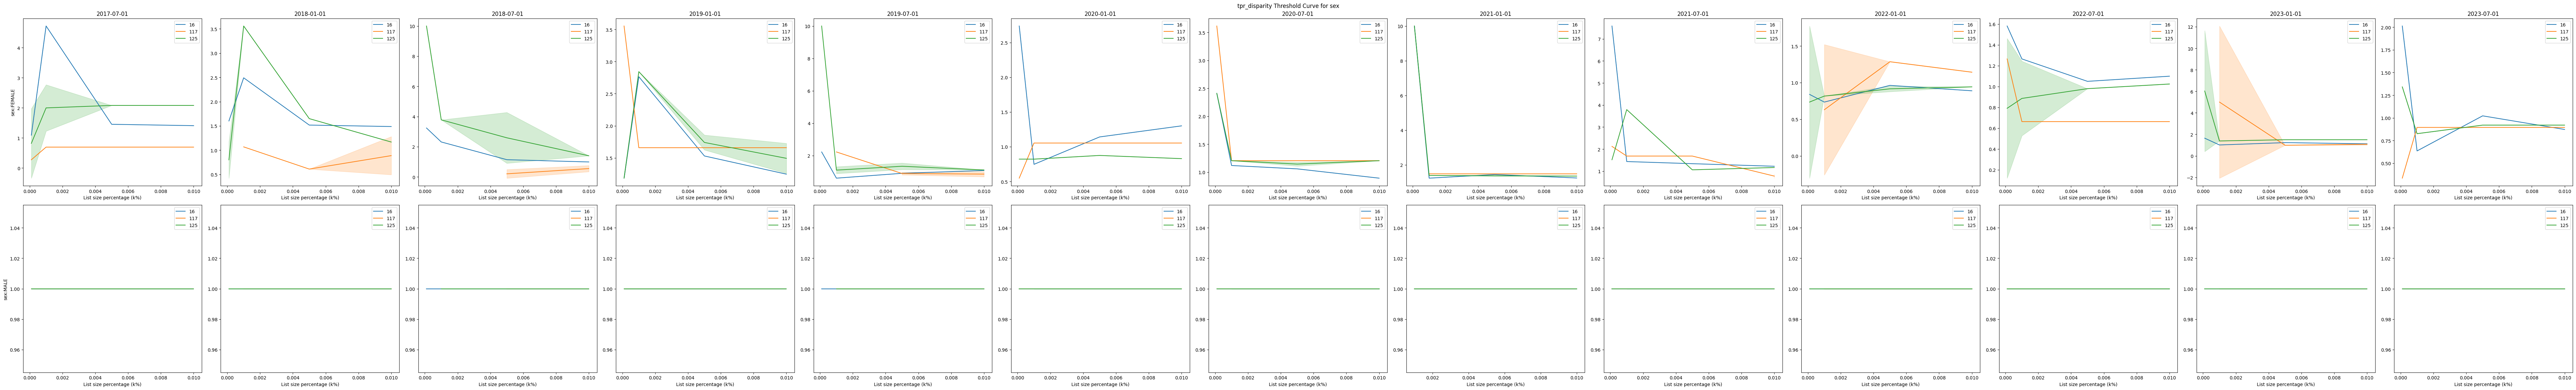

In [ ]:
mma.plot_bias_threshold(attribute_name='sex', attribute_values=['FEMALE', 'MALE'], bias_metric='tpr_disparity')